In [4]:
import os
import pickle
import neurokit2 as nk
import sensors_import_support as sis
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
# Import questionnaires and subjects data
with open('questionnaires.pkl', 'rb') as f:
    subject_data = pickle.load(f)
subject_data.describe()

,ID,Number,STAI_Total,Fatigue,Stress,Mental_Demand,Physical_Demand,Frustration,NASA_Total,PSS,NARS_S1,NARS_S2,NARS_S3,Age,Sex,Experience
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.00000,332.000000,332.000000,332.000000,332.000000
mean,5.581326,7.367470,36.671687,1.771084,8.786145,2.719880,2.566265,2.478916,37.024096,13.837349,11.000000,12.14759,9.774096,32.418675,0.590361,1.304217
std,2.824582,4.416109,9.457364,0.849031,3.137251,1.430092,1.540532,1.649730,21.810071,3.435736,3.651759,3.20864,2.009086,5.884796,0.492509,0.460769
min,1.000000,1.000000,20.000000,1.000000,6.000000,1.000000,1.000000,1.000000,0.000000,9.000000,6.000000,7.00000,7.000000,26.000000,0.000000,1.000000
25%,3.000000,3.000000,30.000000,1.000000,6.000000,2.000000,1.000000,1.000000,18.000000,12.000000,9.000000,9.00000,8.000000,26.000000,0.000000,1.000000
50%,6.000000,7.000000,35.500000,2.000000,8.000000,3.000000,2.000000,2.000000,38.000000,14.000000,10.000000,13.00000,9.000000,35.000000,1.000000,1.000000
75%,8.000000,11.000000,41.000000,2.000000,10.000000,4.000000,4.000000,3.000000,53.000000,15.000000,12.000000,14.00000,11.000000,37.000000,1.000000,2.000000
max,10.000000,15.000000,67.000000,4.000000,23.000000,7.000000,7.000000,7.000000,86.000000,22.000000,19.000000,17.00000,14.000000,41.000000,1.000000,2.000000


In [3]:
# Import signals
signals, fs = sis.import_opensignals('signals_example.txt')
signals[0:10]

,time,ECG,EMG,EDA
0,0.0,-0.00665,-0.04936,4.4125
1,1.0,-0.00773,-0.11435,4.3915
2,2.0,-0.00863,-0.11975,4.3976
3,3.0,-0.00809,-0.12148,4.4014
4,4.0,-0.00683,-0.16526,4.4090
5,5.0,-0.00782,-0.14805,4.3922
6,6.0,-0.00863,-0.05718,4.3995
7,7.0,-0.00907,0.01549,4.4075
8,8.0,-0.00988,0.03701,4.3915
9,9.0,-0.00858,0.05581,4.4052


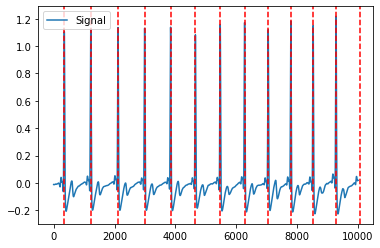

In [4]:
# Plot ecg with R peaks (only a subset, otherwise the plot becomes unreadable!)
ecg_processed, ecg_info = nk.ecg_process(signals['ECG'], sampling_rate=fs)
rpeaks = ecg_info["ECG_R_Peaks"]
cleaned_ecg = ecg_processed["ECG_Clean"]
plot = nk.events_plot(rpeaks[0:13], cleaned_ecg[0:10000])

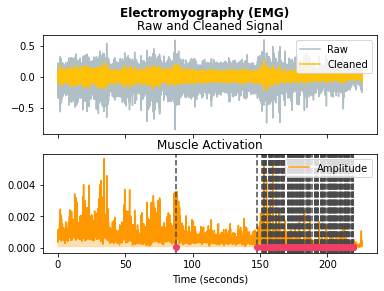

In [5]:
# Plot filtered emg
emg_processed, _ = nk.emg_process(signals['EMG'], sampling_rate=fs)
plot = nk.emg_plot(emg_processed, fs)

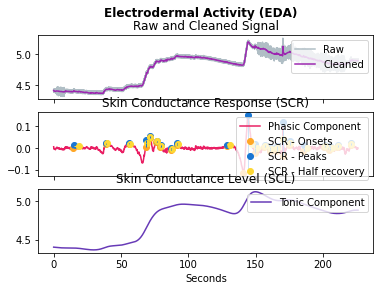

In [19]:
# Plot filtered eda
eda_processed, features = nk.eda_process(signals['EDA'], sampling_rate=fs, method="neurokit")
plot = nk.eda_plot(eda_processed, fs)

In [9]:
# Extraction of features

fs = 1000
window = 30
experiment_type = 'rest'
load_path = os.path.join(os.getcwd(), 'experiments', experiment_type)

In [21]:
# ECG 
# do not run it since there is the csv loaded after
#dataframe_ECG = sis.extract_plux_data_windowed(load_path, 0, window, 'ECG')
# np.save("dataframe_ECG.npy", dataframe_ECG)

In [22]:
# dataframe_ECG = np.load("dataframe_ECG.npy")
# cg_time_and_freq_features = sis.extract_time_and_freq_hrv_features(dataframe_ECG, fs)

In [10]:
# EDA
# have to fix this and make it a pd.DataFrame()
dataframe_EDA = sis.extract_plux_data_windowed(load_path, 0, window, 'EDA')
# np.save("dataframe_EDA.npy", dataframe_EDA)

100%|██████████| 18/18 [00:32<00:00,  1.81s/it]


In [11]:
# dataframe_EDA = np.load("dataframe_EDA.npy")
eda_time_and_freq_features = sis.extract_eda_time_and_frequency_features(dataframe_EDA, fs, window)

C:\robotics-conda\sensors_import_support.py:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_df[f'skewMFCCS_{k}'] = None
C:\robotics-conda\sensors_import_support.py:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_df[f'skewMFCCS_{k}'] = None
C:\robotics-conda\sensors_import_support.py:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.7349e+03 -2.6690e+03  3e+04  2e+02  8e+02
 1: -2.7361e+03 -4.1511e+03  1e+03  8e+00  4e+01
 2: -2.7507e+03 -2.8725e+03  1e+02  6e-01  2e+00
 3: -2.7578e+03 -2.7824e+03  2e+01  4e-02  2e-01
 4: -2.7720e+03 -2.7768e+03  5e+00  4e-04  2e-03
 5: -2.7741e+03 -2.7763e+03  2e+00  9e-05  4e-04
 6: -2.7743e+03 -2.7763e+03  2e+00  7e-05  3e-04
 7: -2.7753e+03 -2.7761e+03  8e-01  2e-05  1e-04
 8: -2.7753e+03 -2.7761e+03  8e-01  2e-05  8e-05
 9: -2.7758e+03 -2.7760e+03  3e-01  4e-06  2e-05
10: -2.7758e+03 -2.7760e+03  2e-01  3e-06  1e-05
11: -2.7759e+03 -2.7760e+03  8e-02  6e-07  2e-06
12: -2.7759e+03 -2.7760e+03  8e-02  4e-07  2e-06
13: -2.7760e+03 -2.7760e+03  2e-02  7e-08  4e-07
14: -2.7760e+03 -2.7760e+03  1e-02  2e-08  2e-07
15: -2.7760e+03 -2.7760e+03  4e-03  1e-08

  1%|          | 1/110 [00:02<05:25,  2.99s/it]

16: -2.7760e+03 -2.7760e+03  2e-03  1e-08  2e-07
17: -2.7760e+03 -2.7760e+03  4e-04  1e-08  3e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.6050e+03 -1.5704e+03  3e+04  2e+02  8e+02
 1: -1.5858e+03 -2.4345e+03  9e+02  5e+00  2e+01
 2: -1.5922e+03 -1.6813e+03  9e+01  4e-01  2e+00
 3: -1.6007e+03 -1.6206e+03  2e+01  3e-02  1e-01
 4: -1.6115e+03 -1.6160e+03  4e+00  3e-04  1e-03
 5: -1.6139e+03 -1.6156e+03  2e+00  7e-05  3e-04
 6: -1.6140e+03 -1.6156e+03  2e+00  5e-05  2e-04
 7: -1.6148e+03 -1.6155e+03  6e-01  1e-05  6e-05
 8: -1.6149e+03 -1.6155e+03  6e-01  1e-05  5e-05
 9: -1.6152e+03 -1.6154e+03  2e-01  1e-06  7e-06
10: -1.6153e+03 -1.6154e+03  1e-01  1e-06  4e-06
11: -1.6154e+03 -1.6154e+03  4e-02  2e-07  8e-07
12: -1.6154e+03 -1.6154e+03  2e-02  4e-08  2e-07
13: -1.

  2%|▏         | 2/110 [00:06<05:51,  3.25s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -8.5669e+03 -8.4902e+03  3e+04  2e+02  3e+02
 1: -8.5730e+03 -9.7834e+03  1e+03  7e+00  1e+01
 2: -8.5840e+03 -8.6805e+03  1e+02  4e-01  7e-01
 3: -8.5916e+03 -8.6104e+03  2e+01  4e-03  7e-03
 4: -8.6056e+03 -8.6089e+03  3e+00  1e-04  3e-04
 5: -8.6065e+03 -8.6082e+03  2e+00  6e-05  1e-04
 6: -8.6066e+03 -8.6082e+03  2e+00  5e-05  8e-05
 7: -8.6075e+03 -8.6080e+03  6e-01  9e-06  2e-05
 8: -8.6075e+03 -8.6080e+03  5e-01  8e-06  1e-05
 9: -8.6078e+03 -8.6080e+03  2e-01  1e-06  2e-06
10: -8.6078e+03 -8.6080e+03  1e-01  7e-07  1e-06
11: -8.6079e+03 -8.6080e+03  5e-02  2e-07  3e-07
12: -8.6079e+03 -8.6080e+03  4e-02  1e-07  2e-07
13: -8.6079e+03 -8.6080e+03  1e-02  2e-08  1e-07
14: -8.6080e+03 -8.6080e+03  5e-03  1e-08  1e-07
15: -8.6080e+03 -8.6080e+03  1e-03  1e-08

  3%|▎         | 3/110 [00:09<05:57,  3.34s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.6723e+03 -2.6353e+03  3e+04  2e+02  7e+02
 1: -2.6601e+03 -3.6129e+03  1e+03  5e+00  2e+01
 2: -2.6694e+03 -2.7774e+03  1e+02  5e-01  2e+00
 3: -2.6768e+03 -2.6969e+03  2e+01  2e-02  7e-02
 4: -2.6894e+03 -2.6936e+03  4e+00  2e-04  7e-04
 5: -2.6911e+03 -2.6931e+03  2e+00  5e-05  2e-04
 6: -2.6912e+03 -2.6931e+03  2e+00  4e-05  1e-04
 7: -2.6922e+03 -2.6929e+03  6e-01  1e-05  4e-05
 8: -2.6923e+03 -2.6929e+03  6e-01  8e-06  3e-05
 9: -2.6927e+03 -2.6928e+03  2e-01  1e-06  5e-06
10: -2.6927e+03 -2.6928e+03  2e-01  9e-07  3e-06
11: -2.6928e+03 -2.6928e+03  5e-02  1e-07  5e-07
12: -2.6928e+03 -2.6928e+03  4e-02  9e-08  4e-07
13: -2.6928e+03 -2.6928e+03  1e-02  2e-08  1e-07
14: -2.6928e+03 -2.6928e+03  5e-03  1e-08  8e-08
15: -2.6928e+03 -2.6928e+03  1e-03  1e-08

  4%|▎         | 4/110 [00:14<07:02,  3.99s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -8.4837e+03 -8.4315e+03  3e+04  2e+02  3e+02
 1: -8.4773e+03 -9.7423e+03  1e+03  7e+00  1e+01
 2: -8.4864e+03 -8.6021e+03  1e+02  5e-01  9e-01
 3: -8.4918e+03 -8.5201e+03  3e+01  5e-02  8e-02
 4: -8.5057e+03 -8.5119e+03  6e+00  5e-04  8e-04
 5: -8.5089e+03 -8.5113e+03  2e+00  1e-04  2e-04
 6: -8.5090e+03 -8.5113e+03  2e+00  1e-04  2e-04
 7: -8.5102e+03 -8.5111e+03  9e-01  3e-05  4e-05
 8: -8.5103e+03 -8.5111e+03  8e-01  2e-05  3e-05
 9: -8.5107e+03 -8.5110e+03  3e-01  5e-06  9e-06
10: -8.5108e+03 -8.5110e+03  3e-01  4e-06  7e-06
11: -8.5109e+03 -8.5110e+03  8e-02  7e-07  1e-06
12: -8.5110e+03 -8.5110e+03  6e-02  4e-07  7e-07
13: -8.5110e+03 -8.5110e+03  2e-02  7e-08  1e-07
14: -8.5110e+03 -8.5110e+03  1e-02  4e-08  7e-08
15: -8.5110e+03 -8.5110e+03  4e-03  1e-08

  5%|▍         | 5/110 [00:20<08:09,  4.66s/it]

17: -8.5110e+03 -8.5110e+03  1e-04  7e-09  7e-08
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.9720e+04 -1.9652e+04  3e+04  2e+02  2e+02
 1: -1.9739e+04 -2.1308e+04  2e+03  9e+00  1e+01
 2: -1.9761e+04 -1.9906e+04  1e+02  7e-01  8e-01
 3: -1.9769e+04 -1.9793e+04  2e+01  3e-02  3e-02
 4: -1.9781e+04 -1.9789e+04  8e+00  4e-03  5e-03
 5: -1.9781e+04 -1.9788e+04  7e+00  3e-03  4e-03
 6: -1.9785e+04 -1.9788e+04  3e+00  1e-03  1e-03
 7: -1.9785e+04 -1.9788e+04  2e+00  8e-04  1e-03
 8: -1.9787e+04 -1.9787e+04  8e-01  1e-04  2e-04
 9: -1.9787e+04 -1.9787e+04  8e-01  1e-04  1e-04
10: -1.9787e+04 -1.9787e+04  3e-01  3e-05  4e-05
11: -1.9787e+04 -1.9787e+04  3e-01  3e-05  3e-05
12: -1.9787e+04 -1.9787e+04  1e-01  6e-06  7e-06
13: -1.9787e+04 -1.9787e+04  9e-02  5e-06  6e-06
14: -1.

  5%|▌         | 6/110 [00:24<07:38,  4.41s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -4.2809e+03 -4.2456e+03  3e+04  2e+02  5e+02
 1: -4.2601e+03 -5.3243e+03  1e+03  6e+00  2e+01
 2: -4.2684e+03 -4.3574e+03  9e+01  4e-01  1e+00
 3: -4.2763e+03 -4.2940e+03  2e+01  4e-03  1e-02
 4: -4.2877e+03 -4.2929e+03  5e+00  1e-03  3e-03
 5: -4.2878e+03 -4.2929e+03  5e+00  1e-03  3e-03
 6: -4.2903e+03 -4.2925e+03  2e+00  3e-04  8e-04
 7: -4.2914e+03 -4.2923e+03  1e+00  8e-05  2e-04
 8: -4.2914e+03 -4.2923e+03  9e-01  6e-05  2e-04
 9: -4.2920e+03 -4.2923e+03  3e-01  8e-06  2e-05
10: -4.2920e+03 -4.2923e+03  3e-01  7e-06  2e-05
11: -4.2922e+03 -4.2923e+03  8e-02  1e-06  3e-06
12: -4.2922e+03 -4.2923e+03  8e-02  9e-07  2e-06
13: -4.2922e+03 -4.2923e+03  3e-02  1e-07  3e-07
14: -4.2922e+03 -4.2923e+03  9e-03  2e-08  8e-08
15: -4.2923e+03 -4.2923e+03  3e-03  7e-09

  6%|▋         | 7/110 [00:29<07:38,  4.45s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.4907e+04 -1.4885e+04  3e+04  2e+02  2e+02
 1: -1.4887e+04 -1.5532e+04  7e+02  4e+00  4e+00
 2: -1.4894e+04 -1.4969e+04  8e+01  3e-01  4e-01
 3: -1.4900e+04 -1.4921e+04  2e+01  2e-02  2e-02
 4: -1.4913e+04 -1.4917e+04  4e+00  3e-03  4e-03
 5: -1.4914e+04 -1.4917e+04  2e+00  2e-03  2e-03
 6: -1.4915e+04 -1.4917e+04  1e+00  7e-04  9e-04
 7: -1.4916e+04 -1.4916e+04  6e-01  2e-04  2e-04
 8: -1.4916e+04 -1.4916e+04  5e-01  1e-04  2e-04
 9: -1.4916e+04 -1.4916e+04  1e-01  2e-05  3e-05
10: -1.4916e+04 -1.4916e+04  1e-01  2e-05  2e-05
11: -1.4916e+04 -1.4916e+04  5e-02  4e-06  5e-06
12: -1.4916e+04 -1.4916e+04  2e-02  7e-07  9e-07
13: -1.4916e+04 -1.4916e+04  2e-02  4e-07  5e-07
14: -1.4916e+04 -1.4916e+04  5e-03  8e-08  1e-07
15: -1.4916e+04 -1.4916e+04  2e-03  2e-08

  7%|▋         | 8/110 [00:33<07:28,  4.39s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.7978e+03 -2.7631e+03  3e+04  2e+02  9e+02
 1: -2.7807e+03 -3.6410e+03  9e+02  5e+00  2e+01
 2: -2.7894e+03 -2.9109e+03  1e+02  6e-01  3e+00
 3: -2.7896e+03 -2.8390e+03  5e+01  1e-01  6e-01
 4: -2.8007e+03 -2.8154e+03  1e+01  3e-03  2e-02
 5: -2.8068e+03 -2.8143e+03  7e+00  6e-04  3e-03
 6: -2.8107e+03 -2.8137e+03  3e+00  2e-04  9e-04
 7: -2.8109e+03 -2.8137e+03  3e+00  2e-04  8e-04
 8: -2.8123e+03 -2.8135e+03  1e+00  4e-05  2e-04
 9: -2.8124e+03 -2.8135e+03  1e+00  3e-05  1e-04
10: -2.8130e+03 -2.8134e+03  4e-01  8e-06  4e-05
11: -2.8130e+03 -2.8134e+03  4e-01  7e-06  3e-05
12: -2.8132e+03 -2.8134e+03  1e-01  1e-06  7e-06
13: -2.8133e+03 -2.8134e+03  1e-01  9e-07  5e-06
14: -2.8133e+03 -2.8134e+03  4e-02  3e-07  1e-06
15: -2.8133e+03 -2.8134e+03  4e-02  2e-07

  8%|▊         | 9/110 [00:38<07:30,  4.46s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -9.5810e+03 -9.5417e+03  3e+04  2e+02  3e+02
 1: -9.5746e+03 -1.1132e+04  2e+03  9e+00  1e+01
 2: -9.5855e+03 -9.7080e+03  1e+02  5e-01  9e-01
 3: -9.5922e+03 -9.6232e+03  3e+01  7e-02  1e-01
 4: -9.6023e+03 -9.6122e+03  1e+01  3e-03  5e-03
 5: -9.6041e+03 -9.6117e+03  8e+00  2e-03  2e-03
 6: -9.6083e+03 -9.6111e+03  3e+00  5e-04  8e-04
 7: -9.6086e+03 -9.6110e+03  2e+00  4e-04  6e-04
 8: -9.6099e+03 -9.6109e+03  1e+00  1e-04  2e-04
 9: -9.6099e+03 -9.6109e+03  9e-01  1e-04  2e-04
10: -9.6105e+03 -9.6108e+03  3e-01  1e-05  2e-05
11: -9.6105e+03 -9.6108e+03  3e-01  9e-06  1e-05
12: -9.6107e+03 -9.6108e+03  7e-02  8e-07  1e-06
13: -9.6108e+03 -9.6108e+03  5e-02  3e-07  4e-07
14: -9.6108e+03 -9.6108e+03  1e-02  5e-08  9e-08
15: -9.6108e+03 -9.6108e+03  4e-03  1e-08

  9%|▉         | 10/110 [00:42<07:12,  4.32s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.5691e+04 -1.5414e+04  5e+04  2e+02  3e+02
 1: -1.5876e+04 -2.1117e+04  6e+03  3e+01  4e+01
 2: -1.6057e+04 -1.7918e+04  2e+03  8e+00  1e+01
 3: -1.6118e+04 -1.6722e+04  6e+02  1e+00  2e+00
 4: -1.6127e+04 -1.6368e+04  2e+02  5e-01  6e-01
 5: -1.6126e+04 -1.6254e+04  1e+02  1e-01  2e-01
 6: -1.6157e+04 -1.6188e+04  3e+01  3e-02  3e-02
 7: -1.6160e+04 -1.6184e+04  2e+01  1e-02  2e-02
 8: -1.6170e+04 -1.6179e+04  9e+00  4e-03  6e-03
 9: -1.6171e+04 -1.6179e+04  8e+00  3e-03  4e-03
10: -1.6174e+04 -1.6177e+04  3e+00  9e-04  1e-03
11: -1.6175e+04 -1.6177e+04  3e+00  7e-04  1e-03
12: -1.6176e+04 -1.6177e+04  1e+00  2e-04  3e-04
13: -1.6176e+04 -1.6177e+04  1e+00  2e-04  2e-04
14: -1.6177e+04 -1.6177e+04  4e-01  3e-05  4e-05
15: -1.

 10%|█         | 11/110 [00:45<06:46,  4.10s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -5.2401e+04 -5.2355e+04  3e+04  2e+02  1e+02
 1: -5.2411e+04 -5.3972e+04  2e+03  9e+00  6e+00
 2: -5.2424e+04 -5.2544e+04  1e+02  5e-01  4e-01
 3: -5.2430e+04 -5.2455e+04  3e+01  4e-02  3e-02
 4: -5.2444e+04 -5.2449e+04  5e+00  4e-03  3e-03
 5: -5.2445e+04 -5.2448e+04  4e+00  3e-03  2e-03
 6: -5.2447e+04 -5.2448e+04  1e+00  7e-04  5e-04
 7: -5.2447e+04 -5.2448e+04  1e+00  5e-04  4e-04
 8: -5.2447e+04 -5.2448e+04  5e-01  1e-04  9e-05
 9: -5.2447e+04 -5.2448e+04  4e-01  1e-04  7e-05
10: -5.2448e+04 -5.2448e+04  1e-01  2e-05  2e-05
11: -5.2448e+04 -5.2448e+04  1e-01  2e-05  1e-05
12: -5.2448e+04 -5.2448e+04  4e-02  4e-06  3e-06
13: -5.2448e+04 -5.2448e+04  4e-02  3e-06  2e-06
14: -5.2448e+04 -5.2448e+04  1e-02  4e-07  3e-07
15: -5.2448e+04 -5.2448e+04  7e-03  2e-07

 11%|█         | 12/110 [00:49<06:33,  4.02s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -4.0377e+04 -4.0351e+04  3e+04  2e+02  1e+02
 1: -4.0351e+04 -4.0794e+04  4e+02  2e+00  2e+00
 2: -4.0355e+04 -4.0393e+04  4e+01  1e-01  8e-02
 3: -4.0372e+04 -4.0377e+04  5e+00  1e-03  8e-04
 4: -4.0376e+04 -4.0377e+04  1e+00  3e-04  2e-04
 5: -4.0376e+04 -4.0377e+04  1e+00  2e-04  2e-04
 6: -4.0376e+04 -4.0377e+04  4e-01  4e-05  3e-05
 7: -4.0376e+04 -4.0377e+04  3e-01  3e-05  2e-05
 8: -4.0377e+04 -4.0377e+04  9e-02  5e-06  4e-06
 9: -4.0377e+04 -4.0377e+04  9e-02  4e-06  3e-06
10: -4.0377e+04 -4.0377e+04  3e-02  7e-07  6e-07
11: -4.0377e+04 -4.0377e+04  2e-02  2e-07  2e-07
12: -4.0377e+04 -4.0377e+04  5e-03  5e-08  4e-08
13: -4.0377e+04 -4.0377e+04  4e-03  3e-08  3e-08
14: -4.0377e+04 -4.0377e+04  1e-03  6e-09  2e-08
15: -4.0377e+04 -4.0377e+04  7e-04  2e-09

 12%|█▏        | 13/110 [00:53<06:38,  4.10s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.7458e+04 -1.7433e+04  3e+04  2e+02  2e+02
 1: -1.7433e+04 -1.7847e+04  4e+02  2e+00  3e+00
 2: -1.7436e+04 -1.7469e+04  3e+01  7e-02  8e-02
 3: -1.7455e+04 -1.7458e+04  3e+00  7e-04  8e-04
 4: -1.7457e+04 -1.7458e+04  5e-01  1e-04  1e-04
 5: -1.7457e+04 -1.7458e+04  3e-01  4e-05  5e-05
 6: -1.7458e+04 -1.7458e+04  1e-01  2e-05  2e-05
 7: -1.7458e+04 -1.7458e+04  1e-01  1e-05  2e-05
 8: -1.7458e+04 -1.7458e+04  4e-02  3e-06  3e-06
 9: -1.7458e+04 -1.7458e+04  3e-02  1e-06  2e-06
10: -1.7458e+04 -1.7458e+04  1e-02  4e-07  5e-07
11: -1.7458e+04 -1.7458e+04  1e-02  3e-07  4e-07
12: -1.7458e+04 -1.7458e+04  4e-03  8e-08  9e-08
13: -1.7458e+04 -1.7458e+04  1e-03  1e-08  3e-08
14: -1.7458e+04 -1.7458e+04  7e-04  6e-09  2e-08
15: -1.

 13%|█▎        | 14/110 [00:57<06:16,  3.92s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -4.8466e+03 -4.8224e+03  3e+04  2e+02  4e+02
 1: -4.8219e+03 -5.2678e+03  5e+02  2e+00  5e+00
 2: -4.8255e+03 -4.8679e+03  4e+01  1e-01  3e-01
 3: -4.8379e+03 -4.8475e+03  1e+01  1e-03  3e-03
 4: -4.8456e+03 -4.8472e+03  2e+00  2e-04  4e-04
 5: -4.8466e+03 -4.8470e+03  5e-01  3e-05  5e-05
 6: -4.8466e+03 -4.8470e+03  4e-01  2e-05  4e-05
 7: -4.8468e+03 -4.8470e+03  2e-01  6e-06  1e-05
 8: -4.8468e+03 -4.8470e+03  2e-01  5e-06  1e-05
 9: -4.8469e+03 -4.8470e+03  4e-02  4e-07  1e-06
10: -4.8469e+03 -4.8470e+03  4e-02  3e-07  7e-07
11: -4.8470e+03 -4.8470e+03  1e-02  5e-08  1e-07
12: -4.8470e+03 -4.8470e+03  9e-03  4e-08  9e-08
13: -4.8470e+03 -4.8470e+03  3e-03  8e-09  7e-08
14: -4.8470e+03 -4.8470e+03  2e-03  6e-09  5e-08
15: -4.8470e+03 -4.8470e+03  6e-04  2e-09

 14%|█▎        | 15/110 [00:59<05:33,  3.51s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -5.0267e+02 -4.7874e+02  3e+04  2e+02  1e+03
 1: -4.7817e+02 -9.1198e+02  4e+02  2e+00  1e+01
 2: -4.8164e+02 -5.1838e+02  4e+01  1e-01  6e-01
 3: -4.9763e+02 -5.0329e+02  6e+00  1e-03  6e-03
 4: -5.0184e+02 -5.0313e+02  1e+00  2e-04  1e-03
 5: -5.0195e+02 -5.0311e+02  1e+00  2e-04  9e-04
 6: -5.0267e+02 -5.0304e+02  4e-01  4e-05  2e-04
 7: -5.0275e+02 -5.0303e+02  3e-01  2e-05  1e-04
 8: -5.0291e+02 -5.0302e+02  1e-01  7e-06  4e-05
 9: -5.0291e+02 -5.0302e+02  1e-01  6e-06  3e-05
10: -5.0297e+02 -5.0302e+02  5e-02  2e-06  1e-05
11: -5.0297e+02 -5.0302e+02  4e-02  1e-06  8e-06
12: -5.0300e+02 -5.0301e+02  1e-02  2e-07  1e-06
13: -5.0301e+02 -5.0301e+02  5e-03  2e-08  2e-07
14: -5.0301e+02 -5.0301e+02  2e-03  4e-09  1e-07
15: -5.

 15%|█▍        | 16/110 [01:02<05:19,  3.40s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.7245e+03 -1.7006e+03  3e+04  2e+02  6e+02
 1: -1.6998e+03 -2.1647e+03  5e+02  3e+00  9e+00
 2: -1.7030e+03 -1.7386e+03  4e+01  9e-02  3e-01
 3: -1.7206e+03 -1.7248e+03  4e+00  9e-04  3e-03
 4: -1.7234e+03 -1.7247e+03  1e+00  2e-04  8e-04
 5: -1.7240e+03 -1.7246e+03  6e-01  9e-05  3e-04
 6: -1.7244e+03 -1.7246e+03  2e-01  3e-05  1e-04
 7: -1.7244e+03 -1.7246e+03  2e-01  2e-05  8e-05
 8: -1.7245e+03 -1.7246e+03  8e-02  8e-06  3e-05
 9: -1.7245e+03 -1.7246e+03  8e-02  6e-06  2e-05
10: -1.7245e+03 -1.7246e+03  2e-02  1e-06  4e-06
11: -1.7245e+03 -1.7246e+03  2e-02  7e-07  2e-06
12: -1.7246e+03 -1.7246e+03  4e-03  1e-07  4e-07
13: -1.7246e+03 -1.7246e+03  2e-03  2e-08  1e-07
14: -1.7246e+03 -1.7246e+03  5e-04  4e-09  1e-07
15: -1.

 15%|█▌        | 17/110 [01:06<05:19,  3.43s/it]

16: -1.7246e+03 -1.7246e+03  1e-04  1e-09  9e-08
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -7.4432e+03 -7.4196e+03  3e+04  2e+02  3e+02
 1: -7.4188e+03 -7.8644e+03  5e+02  2e+00  4e+00
 2: -7.4220e+03 -7.4572e+03  4e+01  9e-02  1e-01
 3: -7.4383e+03 -7.4436e+03  5e+00  9e-04  1e-03
 4: -7.4424e+03 -7.4435e+03  1e+00  2e-04  3e-04
 5: -7.4426e+03 -7.4434e+03  8e-01  1e-04  2e-04
 6: -7.4430e+03 -7.4434e+03  3e-01  4e-05  6e-05
 7: -7.4431e+03 -7.4434e+03  3e-01  3e-05  4e-05
 8: -7.4432e+03 -7.4434e+03  1e-01  8e-06  1e-05
 9: -7.4432e+03 -7.4434e+03  1e-01  6e-06  1e-05
10: -7.4433e+03 -7.4434e+03  2e-02  4e-07  6e-07
11: -7.4433e+03 -7.4434e+03  2e-02  3e-07  5e-07
12: -7.4434e+03 -7.4434e+03  7e-03  6e-08  1e-07
13: -7.4434e+03 -7.4434e+03  6e-03  3e-08  6e-08
14: -7.

 16%|█▋        | 18/110 [01:10<05:19,  3.48s/it]

15: -7.4434e+03 -7.4434e+03  3e-04  1e-09  4e-08
16: -7.4434e+03 -7.4434e+03  1e-04  7e-10  3e-08
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.6239e+04 -1.6214e+04  3e+04  2e+02  2e+02
 1: -1.6214e+04 -1.6734e+04  5e+02  3e+00  3e+00
 2: -1.6217e+04 -1.6257e+04  4e+01  1e-01  1e-01
 3: -1.6233e+04 -1.6239e+04  6e+00  1e-03  1e-03
 4: -1.6238e+04 -1.6239e+04  8e-01  1e-04  2e-04
 5: -1.6238e+04 -1.6239e+04  6e-01  8e-05  9e-05
 6: -1.6239e+04 -1.6239e+04  2e-01  3e-05  3e-05
 7: -1.6239e+04 -1.6239e+04  2e-01  2e-05  2e-05
 8: -1.6239e+04 -1.6239e+04  9e-02  6e-06  8e-06
 9: -1.6239e+04 -1.6239e+04  8e-02  5e-06  5e-06
10: -1.6239e+04 -1.6239e+04  2e-02  6e-07  7e-07
11: -1.6239e+04 -1.6239e+04  1e-02  3e-07  4e-07
12: -1.6239e+04 -1.6239e+04  4e-03  6e-08  7e-08
13: -1.

 17%|█▋        | 19/110 [01:13<05:12,  3.43s/it]

16: -1.6239e+04 -1.6239e+04  4e-05  7e-10  6e-08
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.6495e+04 -2.6471e+04  3e+04  2e+02  2e+02
 1: -2.6470e+04 -2.6878e+04  4e+02  2e+00  2e+00
 2: -2.6474e+04 -2.6506e+04  3e+01  7e-02  7e-02
 3: -2.6491e+04 -2.6495e+04  4e+00  7e-04  7e-04
 4: -2.6494e+04 -2.6495e+04  8e-01  1e-04  1e-04
 5: -2.6494e+04 -2.6495e+04  4e-01  4e-05  4e-05
 6: -2.6494e+04 -2.6495e+04  3e-01  3e-05  3e-05
 7: -2.6495e+04 -2.6495e+04  1e-01  9e-06  9e-06
 8: -2.6495e+04 -2.6495e+04  1e-01  7e-06  6e-06
 9: -2.6495e+04 -2.6495e+04  4e-02  2e-06  2e-06
10: -2.6495e+04 -2.6495e+04  4e-02  1e-06  1e-06
11: -2.6495e+04 -2.6495e+04  9e-03  1e-07  1e-07
12: -2.6495e+04 -2.6495e+04  6e-03  7e-08  6e-08
13: -2.6495e+04 -2.6495e+04  2e-03  1e-08  2e-08
14: -2.

 18%|█▊        | 20/110 [01:15<04:43,  3.16s/it]

15: -2.6495e+04 -2.6495e+04  1e-04  9e-10  2e-08
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.5205e+04 -2.5179e+04  3e+04  2e+02  2e+02
 1: -2.5183e+04 -2.5841e+04  7e+02  4e+00  4e+00
 2: -2.5191e+04 -2.5382e+04  2e+02  1e+00  1e+00
 3: -2.5197e+04 -2.5325e+04  1e+02  5e-01  5e-01
 4: -2.5206e+04 -2.5250e+04  4e+01  1e-01  1e-01
 5: -2.5207e+04 -2.5247e+04  4e+01  1e-01  1e-01
 6: -2.5217e+04 -2.5231e+04  1e+01  3e-02  2e-02
 7: -2.5218e+04 -2.5230e+04  1e+01  2e-02  2e-02
 8: -2.5224e+04 -2.5227e+04  4e+00  4e-03  4e-03
 9: -2.5224e+04 -2.5227e+04  3e+00  3e-03  3e-03
10: -2.5226e+04 -2.5227e+04  1e+00  7e-04  7e-04
11: -2.5226e+04 -2.5227e+04  1e+00  5e-04  4e-04
12: -2.5226e+04 -2.5227e+04  3e-01  1e-04  1e-04
13: -2.5226e+04 -2.5227e+04  3e-01  9e-05  8e-05
14: -2.

 19%|█▉        | 21/110 [01:19<05:01,  3.39s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -8.8103e+03 -8.7839e+03  3e+04  2e+02  3e+02
 1: -8.7862e+03 -9.6013e+03  8e+02  5e+00  7e+00
 2: -8.7952e+03 -9.0356e+03  2e+02  1e+00  2e+00
 3: -8.7994e+03 -8.9633e+03  2e+02  6e-01  1e+00
 4: -8.8089e+03 -8.8478e+03  4e+01  1e-01  2e-01
 5: -8.8119e+03 -8.8385e+03  3e+01  5e-02  9e-02
 6: -8.8200e+03 -8.8294e+03  9e+00  1e-02  2e-02
 7: -8.8208e+03 -8.8290e+03  8e+00  9e-03  1e-02
 8: -8.8248e+03 -8.8275e+03  3e+00  2e-03  4e-03
 9: -8.8251e+03 -8.8274e+03  2e+00  2e-03  2e-03
10: -8.8262e+03 -8.8272e+03  1e+00  5e-04  9e-04
11: -8.8262e+03 -8.8272e+03  1e+00  5e-04  7e-04
12: -8.8268e+03 -8.8271e+03  3e-01  8e-05  1e-04
13: -8.8268e+03 -8.8271e+03  3e-01  6e-05  1e-04
14: -8.8270e+03 -8.8271e+03  1e-01  1e-05  2e-05
15: -8.

 20%|██        | 22/110 [01:23<04:55,  3.35s/it]

19: -8.8271e+03 -8.8271e+03  1e-03  3e-08  1e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.3372e+03 -1.3121e+03  3e+04  2e+02  7e+02
 1: -1.3161e+03 -1.9714e+03  7e+02  4e+00  2e+01
 2: -1.3257e+03 -1.4602e+03  1e+02  7e-01  3e+00
 3: -1.3302e+03 -1.3964e+03  7e+01  2e-01  8e-01
 4: -1.3324e+03 -1.3666e+03  3e+01  4e-02  2e-01
 5: -1.3452e+03 -1.3567e+03  1e+01  1e-02  5e-02
 6: -1.3457e+03 -1.3564e+03  1e+01  9e-03  4e-02
 7: -1.3504e+03 -1.3548e+03  4e+00  3e-03  1e-02
 8: -1.3507e+03 -1.3548e+03  4e+00  2e-03  9e-03
 9: -1.3528e+03 -1.3544e+03  2e+00  6e-04  2e-03
10: -1.3536e+03 -1.3543e+03  7e-01  1e-04  6e-04
11: -1.3541e+03 -1.3543e+03  2e-01  2e-05  9e-05
12: -1.3541e+03 -1.3543e+03  2e-01  2e-05  8e-05
13: -1.3542e+03 -1.3543e+03  9e-02  5e-06  2e-05
14: -1.

 21%|██        | 23/110 [01:25<04:26,  3.06s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.4292e+03 -1.4009e+03  3e+04  2e+02  7e+02
 1: -1.4069e+03 -2.2377e+03  9e+02  5e+00  2e+01
 2: -1.4175e+03 -1.5712e+03  2e+02  8e-01  3e+00
 3: -1.4213e+03 -1.4884e+03  7e+01  2e-01  8e-01
 4: -1.4254e+03 -1.4575e+03  3e+01  4e-02  2e-01
 5: -1.4373e+03 -1.4489e+03  1e+01  1e-02  4e-02
 6: -1.4378e+03 -1.4487e+03  1e+01  9e-03  3e-02
 7: -1.4430e+03 -1.4472e+03  4e+00  2e-03  9e-03
 8: -1.4435e+03 -1.4471e+03  4e+00  2e-03  6e-03
 9: -1.4454e+03 -1.4468e+03  1e+00  4e-04  2e-03
10: -1.4455e+03 -1.4468e+03  1e+00  4e-04  1e-03
11: -1.4463e+03 -1.4467e+03  4e-01  8e-05  3e-04
12: -1.4463e+03 -1.4467e+03  4e-01  7e-05  3e-04
13: -1.4465e+03 -1.4467e+03  2e-01  2e-05  8e-05
14: -1.4466e+03 -1.4467e+03  1e-01  4e-06  2e-05
15: -1.4467e+03 -1.4467e+03  4e-02  9e-07

 22%|██▏       | 24/110 [01:27<04:07,  2.88s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -9.4792e+03 -9.4511e+03  3e+04  2e+02  3e+02
 1: -9.4560e+03 -1.0085e+04  6e+02  4e+00  5e+00
 2: -9.4630e+03 -9.5199e+03  6e+01  2e-01  3e-01
 3: -9.4704e+03 -9.4948e+03  2e+01  6e-02  1e-01
 4: -9.4725e+03 -9.4912e+03  2e+01  3e-02  5e-02
 5: -9.4819e+03 -9.4866e+03  5e+00  8e-03  1e-02
 6: -9.4826e+03 -9.4864e+03  4e+00  4e-03  7e-03
 7: -9.4845e+03 -9.4860e+03  2e+00  2e-03  2e-03
 8: -9.4846e+03 -9.4860e+03  1e+00  1e-03  2e-03
 9: -9.4854e+03 -9.4859e+03  5e-01  3e-04  5e-04
10: -9.4854e+03 -9.4859e+03  5e-01  2e-04  4e-04
11: -9.4857e+03 -9.4859e+03  1e-01  3e-05  4e-05
12: -9.4858e+03 -9.4859e+03  1e-01  1e-05  2e-05
13: -9.4858e+03 -9.4859e+03  3e-02  2e-06  3e-06
14: -9.4858e+03 -9.4859e+03  2e-02  1e-06  2e-06
15: -9.

 23%|██▎       | 25/110 [01:31<04:17,  3.03s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.2201e+04 -2.2173e+04  3e+04  2e+02  2e+02
 1: -2.2177e+04 -2.2946e+04  8e+02  4e+00  4e+00
 2: -2.2187e+04 -2.2352e+04  2e+02  8e-01  8e-01
 3: -2.2189e+04 -2.2277e+04  9e+01  3e-01  3e-01
 4: -2.2190e+04 -2.2263e+04  7e+01  2e-01  2e-01
 5: -2.2201e+04 -2.2230e+04  3e+01  7e-02  7e-02
 6: -2.2202e+04 -2.2228e+04  3e+01  5e-02  5e-02
 7: -2.2210e+04 -2.2221e+04  1e+01  2e-02  2e-02
 8: -2.2210e+04 -2.2221e+04  1e+01  2e-02  2e-02
 9: -2.2214e+04 -2.2220e+04  5e+00  6e-03  6e-03
10: -2.2215e+04 -2.2219e+04  5e+00  5e-03  5e-03
11: -2.2217e+04 -2.2219e+04  2e+00  8e-04  9e-04
12: -2.2218e+04 -2.2219e+04  1e+00  5e-04  5e-04
13: -2.2218e+04 -2.2219e+04  5e-01  1e-04  1e-04
14: -2.2218e+04 -2.2219e+04  4e-01  1e-04  1e-04
15: -2.

 24%|██▎       | 26/110 [01:34<04:25,  3.16s/it]

20: -2.2219e+04 -2.2219e+04  9e-04  4e-08  5e-08
21: -2.2219e+04 -2.2219e+04  2e-04  4e-08  2e-08
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.6169e+04 -1.5563e+04  6e+04  2e+02  4e+02
 1: -1.6683e+04 -2.5978e+04  1e+04  5e+01  8e+01
 2: -1.7236e+04 -2.0258e+04  3e+03  8e+00  1e+01
 3: -1.7282e+04 -1.7813e+04  5e+02  1e+00  2e+00
 4: -1.7324e+04 -1.7634e+04  3e+02  5e-01  9e-01
 5: -1.7342e+04 -1.7591e+04  2e+02  3e-01  6e-01
 6: -1.7370e+04 -1.7441e+04  7e+01  7e-02  1e-01
 7: -1.7376e+04 -1.7431e+04  6e+01  4e-02  6e-02
 8: -1.7394e+04 -1.7412e+04  2e+01  1e-02  2e-02
 9: -1.7395e+04 -1.7411e+04  2e+01  8e-03  1e-02
10: -1.7401e+04 -1.7408e+04  7e+00  2e-03  4e-03
11: -1.7401e+04 -1.7408e+04  6e+00  2e-03  3e-03
12: -1.7405e+04 -1.7407e+04  2e+00  3e-04  4e-04
13: -1.

 25%|██▍       | 27/110 [01:38<04:33,  3.29s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.6028e+03 -2.5558e+03  4e+04  2e+02  7e+02
 1: -2.6204e+03 -5.0398e+03  3e+03  1e+01  5e+01
 2: -2.7269e+03 -3.4407e+03  7e+02  3e+00  1e+01
 3: -2.7690e+03 -3.0300e+03  3e+02  9e-01  3e+00
 4: -2.7830e+03 -2.9668e+03  2e+02  5e-01  2e+00
 5: -2.7988e+03 -2.8615e+03  6e+01  1e-01  5e-01
 6: -2.8023e+03 -2.8594e+03  6e+01  1e-01  4e-01
 7: -2.8158e+03 -2.8371e+03  2e+01  3e-02  9e-02
 8: -2.8172e+03 -2.8365e+03  2e+01  2e-02  7e-02
 9: -2.8241e+03 -2.8324e+03  8e+00  6e-03  2e-02
10: -2.8245e+03 -2.8322e+03  8e+00  5e-03  2e-02
11: -2.8277e+03 -2.8312e+03  3e+00  2e-03  6e-03
12: -2.8279e+03 -2.8311e+03  3e+00  1e-03  5e-03
13: -2.8294e+03 -2.8309e+03  1e+00  5e-04  2e-03
14: -2.8296e+03 -2.8308e+03  1e+00  3e-04  1e-03
15: -2.

 25%|██▌       | 28/110 [01:41<04:32,  3.32s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -6.4676e+03 -6.4241e+03  3e+04  2e+02  3e+02
 1: -6.4651e+03 -8.4783e+03  2e+03  1e+01  2e+01
 2: -6.5273e+03 -7.0982e+03  6e+02  3e+00  5e+00
 3: -6.5464e+03 -6.7561e+03  2e+02  7e-01  1e+00
 4: -6.5530e+03 -6.6099e+03  6e+01  1e-01  2e-01
 5: -6.5665e+03 -6.5846e+03  2e+01  6e-03  1e-02
 6: -6.5702e+03 -6.5830e+03  1e+01  2e-03  4e-03
 7: -6.5774e+03 -6.5810e+03  4e+00  6e-04  1e-03
 8: -6.5776e+03 -6.5810e+03  3e+00  5e-04  9e-04
 9: -6.5793e+03 -6.5807e+03  1e+00  1e-04  2e-04
10: -6.5793e+03 -6.5807e+03  1e+00  9e-05  2e-04
11: -6.5800e+03 -6.5806e+03  5e-01  1e-05  2e-05
12: -6.5803e+03 -6.5805e+03  2e-01  2e-06  4e-06
13: -6.5804e+03 -6.5805e+03  1e-01  7e-07  1e-06
14: -6.5805e+03 -6.5805e+03  4e-02  1e-07  3e-07
15: -6.

 26%|██▋       | 29/110 [01:44<04:17,  3.17s/it]

18: -6.5805e+03 -6.5805e+03  1e-03  3e-08  3e-08
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -5.9861e+03 -5.6722e+03  5e+04  2e+02  7e+02
 1: -6.1933e+03 -1.2132e+04  7e+03  3e+01  1e+02
 2: -6.3874e+03 -7.7622e+03  1e+03  4e+00  1e+01
 3: -6.4045e+03 -6.5999e+03  2e+02  5e-01  2e+00
 4: -6.4074e+03 -6.4782e+03  7e+01  1e-01  3e-01
 5: -6.4211e+03 -6.4479e+03  3e+01  1e-02  4e-02
 6: -6.4291e+03 -6.4436e+03  1e+01  3e-03  1e-02
 7: -6.4363e+03 -6.4415e+03  5e+00  9e-04  3e-03
 8: -6.4367e+03 -6.4414e+03  5e+00  7e-04  2e-03
 9: -6.4388e+03 -6.4408e+03  2e+00  2e-04  8e-04
10: -6.4399e+03 -6.4407e+03  8e-01  3e-05  9e-05
11: -6.4399e+03 -6.4407e+03  7e-01  2e-05  7e-05
12: -6.4403e+03 -6.4406e+03  3e-01  6e-06  2e-05
13: -6.4405e+03 -6.4406e+03  1e-01  7e-07  2e-06
14: -6.

 27%|██▋       | 30/110 [01:48<04:29,  3.36s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -6.3305e+03 -6.2503e+03  4e+04  2e+02  4e+02
 1: -6.3427e+03 -8.5212e+03  2e+03  1e+01  2e+01
 2: -6.4090e+03 -6.6743e+03  3e+02  1e+00  2e+00
 3: -6.4238e+03 -6.4942e+03  7e+01  2e-01  4e-01
 4: -6.4301e+03 -6.4618e+03  3e+01  5e-02  9e-02
 5: -6.4344e+03 -6.4559e+03  2e+01  2e-02  4e-02
 6: -6.4444e+03 -6.4501e+03  6e+00  5e-03  9e-03
 7: -6.4450e+03 -6.4499e+03  5e+00  3e-03  6e-03
 8: -6.4473e+03 -6.4490e+03  2e+00  9e-04  2e-03
 9: -6.4474e+03 -6.4490e+03  2e+00  8e-04  1e-03
10: -6.4483e+03 -6.4489e+03  6e-01  1e-04  2e-04
11: -6.4484e+03 -6.4488e+03  5e-01  8e-05  1e-04
12: -6.4487e+03 -6.4488e+03  1e-01  2e-05  3e-05
13: -6.4487e+03 -6.4488e+03  1e-01  1e-05  2e-05
14: -6.4488e+03 -6.4488e+03  4e-02  2e-06  4e-06
15: -6.

 28%|██▊       | 31/110 [01:52<04:33,  3.46s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -8.2114e+03 -8.1391e+03  3e+04  2e+02  3e+02
 1: -8.2153e+03 -1.0270e+04  2e+03  1e+01  2e+01
 2: -8.2921e+03 -8.6375e+03  3e+02  1e+00  2e+00
 3: -8.3019e+03 -8.3811e+03  8e+01  3e-01  4e-01
 4: -8.3057e+03 -8.3490e+03  4e+01  8e-02  1e-01
 5: -8.3093e+03 -8.3405e+03  3e+01  4e-02  7e-02
 6: -8.3235e+03 -8.3307e+03  7e+00  8e-03  1e-02
 7: -8.3244e+03 -8.3300e+03  6e+00  4e-03  7e-03
 8: -8.3270e+03 -8.3291e+03  2e+00  1e-03  2e-03
 9: -8.3272e+03 -8.3291e+03  2e+00  1e-03  2e-03
10: -8.3281e+03 -8.3288e+03  7e-01  3e-04  4e-04
11: -8.3284e+03 -8.3288e+03  4e-01  5e-05  9e-05
12: -8.3286e+03 -8.3288e+03  1e-01  1e-05  2e-05
13: -8.3287e+03 -8.3288e+03  1e-01  1e-05  2e-05
14: -8.3287e+03 -8.3288e+03  6e-02  3e-06  4e-06
15: -8.

 29%|██▉       | 32/110 [01:55<04:18,  3.32s/it]

18: -8.3288e+03 -8.3288e+03  1e-03  3e-08  6e-08
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -5.4891e+03 -5.2883e+03  4e+04  2e+02  6e+02
 1: -5.6138e+03 -9.0106e+03  4e+03  2e+01  6e+01
 2: -5.7605e+03 -6.3990e+03  6e+02  3e+00  8e+00
 3: -5.7758e+03 -5.9447e+03  2e+02  6e-01  2e+00
 4: -5.7785e+03 -5.8617e+03  8e+01  2e-01  4e-01
 5: -5.7960e+03 -5.8148e+03  2e+01  2e-02  6e-02
 6: -5.7984e+03 -5.8119e+03  1e+01  1e-02  3e-02
 7: -5.8040e+03 -5.8084e+03  4e+00  3e-03  9e-03
 8: -5.8048e+03 -5.8083e+03  3e+00  2e-03  5e-03
 9: -5.8064e+03 -5.8078e+03  1e+00  5e-04  2e-03
10: -5.8065e+03 -5.8078e+03  1e+00  5e-04  1e-03
11: -5.8072e+03 -5.8076e+03  5e-01  7e-05  2e-04
12: -5.8072e+03 -5.8076e+03  4e-01  4e-05  1e-04
13: -5.8074e+03 -5.8076e+03  2e-01  2e-05  5e-05
14: -5.

 30%|███       | 33/110 [01:57<03:55,  3.06s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -3.6425e+03 -3.6103e+03  3e+04  2e+02  5e+02
 1: -3.6307e+03 -5.3173e+03  2e+03  1e+01  2e+01
 2: -3.6630e+03 -4.0315e+03  4e+02  2e+00  5e+00
 3: -3.6707e+03 -3.8107e+03  1e+02  4e-01  1e+00
 4: -3.6744e+03 -3.7221e+03  5e+01  6e-02  2e-01
 5: -3.6865e+03 -3.7038e+03  2e+01  6e-04  2e-03
 6: -3.6945e+03 -3.7011e+03  7e+00  2e-04  5e-04
 7: -3.6951e+03 -3.7009e+03  6e+00  1e-04  3e-04
 8: -3.6978e+03 -3.7000e+03  2e+00  4e-05  1e-04
 9: -3.6985e+03 -3.6999e+03  1e+00  2e-05  4e-05
10: -3.6992e+03 -3.6998e+03  6e-01  5e-06  1e-05
11: -3.6992e+03 -3.6998e+03  5e-01  4e-06  1e-05
12: -3.6995e+03 -3.6997e+03  2e-01  1e-06  2e-06
13: -3.6995e+03 -3.6997e+03  2e-01  9e-07  2e-06
14: -3.6996e+03 -3.6997e+03  1e-01  2e-07  6e-07
15: -3.6997e+03 -3.6997e+03  4e-02  6e-08

 31%|███       | 34/110 [02:00<03:54,  3.09s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.6931e+03 -1.6019e+03  4e+04  2e+02  9e+02
 1: -1.7168e+03 -4.6513e+03  3e+03  2e+01  8e+01
 2: -1.7696e+03 -2.1302e+03  4e+02  1e+00  7e+00
 3: -1.7778e+03 -1.8712e+03  9e+01  3e-01  1e+00
 4: -1.7778e+03 -1.8387e+03  6e+01  1e-01  6e-01
 5: -1.7938e+03 -1.8077e+03  1e+01  2e-02  9e-02
 6: -1.7964e+03 -1.8055e+03  9e+00  8e-03  3e-02
 7: -1.8011e+03 -1.8039e+03  3e+00  2e-03  1e-02
 8: -1.8012e+03 -1.8039e+03  3e+00  2e-03  7e-03
 9: -1.8025e+03 -1.8036e+03  1e+00  5e-04  2e-03
10: -1.8029e+03 -1.8036e+03  7e-01  2e-04  8e-04
11: -1.8033e+03 -1.8035e+03  3e-01  4e-05  2e-04
12: -1.8033e+03 -1.8035e+03  2e-01  3e-05  1e-04
13: -1.8035e+03 -1.8035e+03  7e-02  5e-06  2e-05
14: -1.8035e+03 -1.8035e+03  7e-02  5e-06  2e-05
15: -1.

 32%|███▏      | 35/110 [02:04<04:03,  3.25s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.6654e+04 -2.6628e+04  3e+04  2e+02  2e+02
 1: -2.6631e+04 -2.7308e+04  7e+02  4e+00  4e+00
 2: -2.6642e+04 -2.6788e+04  1e+02  8e-01  7e-01
 3: -2.6648e+04 -2.6755e+04  1e+02  4e-01  4e-01
 4: -2.6656e+04 -2.6704e+04  5e+01  1e-01  1e-01
 5: -2.6663e+04 -2.6689e+04  3e+01  4e-02  3e-02
 6: -2.6673e+04 -2.6680e+04  7e+00  7e-03  7e-03
 7: -2.6673e+04 -2.6680e+04  7e+00  7e-03  6e-03
 8: -2.6674e+04 -2.6679e+04  5e+00  4e-03  4e-03
 9: -2.6676e+04 -2.6678e+04  2e+00  1e-03  1e-03
10: -2.6677e+04 -2.6678e+04  8e-01  4e-04  3e-04
11: -2.6677e+04 -2.6678e+04  3e-01  9e-05  8e-05
12: -2.6678e+04 -2.6678e+04  1e-01  8e-06  7e-06
13: -2.6678e+04 -2.6678e+04  6e-02  2e-06  2e-06
14: -2.6678e+04 -2.6678e+04  2e-02  2e-07  4e-07
15: -2.

 33%|███▎      | 36/110 [02:07<03:58,  3.22s/it]

16: -2.6678e+04 -2.6678e+04  4e-03  6e-08  2e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.6376e+04 -1.6352e+04  3e+04  2e+02  2e+02
 1: -1.6352e+04 -1.6876e+04  5e+02  3e+00  3e+00
 2: -1.6358e+04 -1.6479e+04  1e+02  6e-01  7e-01
 3: -1.6362e+04 -1.6399e+04  4e+01  9e-02  1e-01
 4: -1.6372e+04 -1.6384e+04  1e+01  2e-02  2e-02
 5: -1.6375e+04 -1.6382e+04  7e+00  6e-03  7e-03
 6: -1.6378e+04 -1.6381e+04  3e+00  2e-03  2e-03
 7: -1.6378e+04 -1.6381e+04  2e+00  1e-03  2e-03
 8: -1.6379e+04 -1.6380e+04  8e-01  4e-04  5e-04
 9: -1.6379e+04 -1.6380e+04  8e-01  4e-04  4e-04
10: -1.6380e+04 -1.6380e+04  3e-01  8e-05  9e-05
11: -1.6380e+04 -1.6380e+04  3e-01  7e-05  8e-05
12: -1.6380e+04 -1.6380e+04  1e-01  8e-06  1e-05
13: -1.6380e+04 -1.6380e+04  1e-01  7e-06  9e-06
14: -1.

 34%|███▎      | 37/110 [02:10<03:53,  3.20s/it]

17: -1.6380e+04 -1.6380e+04  2e-03  2e-08  2e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -8.0697e+03 -8.0454e+03  3e+04  2e+02  3e+02
 1: -8.0456e+03 -8.5743e+03  5e+02  3e+00  5e+00
 2: -8.0517e+03 -8.1115e+03  6e+01  2e-01  4e-01
 3: -8.0612e+03 -8.0745e+03  1e+01  5e-03  8e-03
 4: -8.0666e+03 -8.0736e+03  7e+00  2e-03  3e-03
 5: -8.0705e+03 -8.0730e+03  3e+00  7e-04  1e-03
 6: -8.0707e+03 -8.0730e+03  2e+00  5e-04  9e-04
 7: -8.0720e+03 -8.0727e+03  7e-01  1e-04  2e-04
 8: -8.0720e+03 -8.0727e+03  7e-01  1e-04  2e-04
 9: -8.0724e+03 -8.0727e+03  3e-01  2e-05  4e-05
10: -8.0724e+03 -8.0727e+03  3e-01  2e-05  4e-05
11: -8.0725e+03 -8.0727e+03  1e-01  4e-06  7e-06
12: -8.0726e+03 -8.0727e+03  1e-01  4e-06  6e-06
13: -8.0726e+03 -8.0727e+03  5e-02  9e-07  2e-06
14: -8.

 35%|███▍      | 38/110 [02:13<03:48,  3.17s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.8704e+03 -1.8461e+03  3e+04  2e+02  6e+02
 1: -1.8456e+03 -2.3106e+03  5e+02  3e+00  9e+00
 2: -1.8495e+03 -1.8837e+03  3e+01  8e-02  3e-01
 3: -1.8670e+03 -1.8711e+03  4e+00  8e-04  3e-03
 4: -1.8699e+03 -1.8709e+03  1e+00  2e-04  6e-04
 5: -1.8700e+03 -1.8709e+03  9e-01  1e-04  5e-04
 6: -1.8705e+03 -1.8708e+03  3e-01  4e-05  1e-04
 7: -1.8705e+03 -1.8708e+03  3e-01  3e-05  1e-04
 8: -1.8707e+03 -1.8708e+03  1e-01  1e-05  4e-05
 9: -1.8707e+03 -1.8708e+03  1e-01  9e-06  3e-05
10: -1.8707e+03 -1.8708e+03  5e-02  2e-06  7e-06
11: -1.8707e+03 -1.8708e+03  5e-02  2e-06  6e-06
12: -1.8708e+03 -1.8708e+03  2e-02  3e-07  1e-06
13: -1.8708e+03 -1.8708e+03  2e-02  3e-07  9e-07
14: -1.8708e+03 -1.8708e+03  6e-03  5e-08  2e-07
15: -1.

 35%|███▌      | 39/110 [02:17<03:50,  3.25s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.0066e+03 -9.8300e+02  3e+04  2e+02  8e+02
 1: -9.8273e+02 -1.4315e+03  5e+02  2e+00  1e+01
 2: -9.8621e+02 -1.0187e+03  3e+01  7e-02  3e-01
 3: -1.0047e+03 -1.0076e+03  3e+00  7e-04  3e-03
 4: -1.0060e+03 -1.0074e+03  1e+00  2e-04  1e-03
 5: -1.0068e+03 -1.0073e+03  5e-01  7e-05  3e-04
 6: -1.0068e+03 -1.0073e+03  5e-01  6e-05  3e-04
 7: -1.0071e+03 -1.0073e+03  2e-01  2e-05  8e-05
 8: -1.0071e+03 -1.0073e+03  2e-01  1e-05  6e-05
 9: -1.0072e+03 -1.0073e+03  7e-02  3e-06  1e-05
10: -1.0072e+03 -1.0073e+03  7e-02  2e-06  1e-05
11: -1.0073e+03 -1.0073e+03  2e-02  3e-07  1e-06
12: -1.0073e+03 -1.0073e+03  2e-02  2e-07  1e-06
13: -1.0073e+03 -1.0073e+03  8e-03  3e-08  2e-07
14: -1.0073e+03 -1.0073e+03  3e-03  6e-09  2e-07
15: -1.0073e+03 -1.0073e+03  2e-03  4e-09

 36%|███▋      | 40/110 [02:21<04:14,  3.64s/it]

18: -1.0073e+03 -1.0073e+03  6e-05  3e-09  1e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -8.3527e+03 -8.3248e+03  3e+04  2e+02  3e+02
 1: -8.3323e+03 -9.0776e+03  8e+02  4e+00  7e+00
 2: -8.3410e+03 -8.4361e+03  1e+02  4e-01  7e-01
 3: -8.3482e+03 -8.3794e+03  3e+01  8e-02  1e-01
 4: -8.3583e+03 -8.3678e+03  9e+00  8e-03  1e-02
 5: -8.3608e+03 -8.3666e+03  6e+00  2e-03  4e-03
 6: -8.3636e+03 -8.3657e+03  2e+00  8e-04  1e-03
 7: -8.3638e+03 -8.3656e+03  2e+00  6e-04  9e-04
 8: -8.3647e+03 -8.3654e+03  7e-01  1e-04  2e-04
 9: -8.3648e+03 -8.3654e+03  6e-01  1e-04  2e-04
10: -8.3651e+03 -8.3653e+03  2e-01  3e-05  5e-05
11: -8.3652e+03 -8.3653e+03  2e-01  1e-05  2e-05
12: -8.3653e+03 -8.3653e+03  5e-02  3e-06  4e-06
13: -8.3653e+03 -8.3653e+03  5e-02  2e-06  3e-06
14: -8.

 37%|███▋      | 41/110 [02:25<04:07,  3.59s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.7770e+04 -1.7745e+04  3e+04  2e+02  2e+02
 1: -1.7745e+04 -1.8210e+04  5e+02  3e+00  3e+00
 2: -1.7750e+04 -1.7795e+04  5e+01  1e-01  2e-01
 3: -1.7763e+04 -1.7772e+04  9e+00  1e-03  2e-03
 4: -1.7769e+04 -1.7771e+04  3e+00  4e-04  4e-04
 5: -1.7770e+04 -1.7771e+04  1e+00  2e-04  2e-04
 6: -1.7770e+04 -1.7771e+04  6e-01  6e-05  6e-05
 7: -1.7770e+04 -1.7771e+04  6e-01  4e-05  5e-05
 8: -1.7771e+04 -1.7771e+04  2e-01  1e-05  1e-05
 9: -1.7771e+04 -1.7771e+04  2e-01  8e-06  9e-06
10: -1.7771e+04 -1.7771e+04  6e-02  2e-06  2e-06
11: -1.7771e+04 -1.7771e+04  6e-02  1e-06  1e-06
12: -1.7771e+04 -1.7771e+04  2e-02  2e-07  3e-07
13: -1.7771e+04 -1.7771e+04  2e-02  2e-07  2e-07
14: -1.7771e+04 -1.7771e+04  5e-03  3e-08  6e-08
15: -1.7771e+04 -1.7771e+04  3e-03  1e-08

 38%|███▊      | 42/110 [02:28<03:53,  3.43s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -3.9724e+03 -3.9113e+03  4e+04  2e+02  5e+02
 1: -3.9815e+03 -6.3843e+03  3e+03  1e+01  3e+01
 2: -4.0183e+03 -4.3422e+03  3e+02  1e+00  4e+00
 3: -4.0438e+03 -4.2001e+03  2e+02  5e-01  1e+00
 4: -4.0556e+03 -4.1723e+03  1e+02  3e-01  6e-01
 5: -4.0581e+03 -4.1631e+03  1e+02  2e-01  5e-01
 6: -4.0742e+03 -4.1127e+03  4e+01  6e-02  1e-01
 7: -4.0757e+03 -4.1104e+03  3e+01  5e-02  1e-01
 8: -4.0849e+03 -4.1011e+03  2e+01  2e-02  4e-02
 9: -4.0860e+03 -4.1002e+03  1e+01  1e-02  3e-02
10: -4.0920e+03 -4.0977e+03  6e+00  4e-03  9e-03
11: -4.0922e+03 -4.0976e+03  5e+00  3e-03  8e-03
12: -4.0951e+03 -4.0971e+03  2e+00  6e-04  2e-03
13: -4.0952e+03 -4.0970e+03  2e+00  5e-04  1e-03
14: -4.0961e+03 -4.0970e+03  9e-01  2e-04  4e-04
15: -4.0961e+03 -4.0970e+03  8e-01  1e-04

 39%|███▉      | 43/110 [02:31<03:51,  3.45s/it]

20: -4.0969e+03 -4.0969e+03  4e-02  1e-06  3e-06
21: -4.0969e+03 -4.0969e+03  1e-02  3e-07  6e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.6096e+03 -1.5859e+03  3e+04  2e+02  6e+02
 1: -1.5894e+03 -2.3025e+03  7e+02  4e+00  1e+01
 2: -1.5979e+03 -1.7156e+03  1e+02  6e-01  2e+00
 3: -1.6022e+03 -1.6536e+03  5e+01  2e-01  6e-01
 4: -1.6045e+03 -1.6426e+03  4e+01  9e-02  3e-01
 5: -1.6148e+03 -1.6275e+03  1e+01  2e-02  8e-02
 6: -1.6157e+03 -1.6268e+03  1e+01  2e-02  6e-02
 7: -1.6201e+03 -1.6248e+03  5e+00  6e-03  2e-02
 8: -1.6203e+03 -1.6247e+03  4e+00  5e-03  2e-02
 9: -1.6224e+03 -1.6242e+03  2e+00  1e-03  4e-03
10: -1.6225e+03 -1.6242e+03  2e+00  1e-03  4e-03
11: -1.6235e+03 -1.6241e+03  7e-01  2e-04  7e-04
12: -1.6235e+03 -1.6241e+03  7e-01  2e-04  7e-04
13: -1.

 40%|████      | 44/110 [02:35<03:49,  3.47s/it]

18: -1.6241e+03 -1.6241e+03  2e-03  4e-08  2e-07
19: -1.6241e+03 -1.6241e+03  3e-04  4e-08  5e-08
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -3.7021e+02 -3.4236e+02  3e+04  2e+02  1e+03
 1: -3.4868e+02 -1.1775e+03  9e+02  5e+00  3e+01
 2: -3.6002e+02 -4.7270e+02  1e+02  5e-01  3e+00
 3: -3.6672e+02 -4.1727e+02  5e+01  2e-01  8e-01
 4: -3.6916e+02 -4.0845e+02  4e+01  9e-02  5e-01
 5: -3.8009e+02 -3.9231e+02  1e+01  2e-02  1e-01
 6: -3.8081e+02 -3.9171e+02  1e+01  2e-02  9e-02
 7: -3.8550e+02 -3.8938e+02  4e+00  4e-03  2e-02
 8: -3.8563e+02 -3.8935e+02  4e+00  4e-03  2e-02
 9: -3.8747e+02 -3.8896e+02  1e+00  8e-04  5e-03
10: -3.8758e+02 -3.8895e+02  1e+00  6e-04  3e-03
11: -3.8836e+02 -3.8886e+02  5e-01  1e-04  8e-04
12: -3.8840e+02 -3.8885e+02  5e-01  1e-04  6e-04
13: -3.

 41%|████      | 45/110 [02:38<03:40,  3.40s/it]

18: -3.8883e+02 -3.8883e+02  7e-04  4e-08  8e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -5.6392e+01 -3.2384e+01  3e+04  2e+02  1e+03
 1: -3.4384e+01 -7.4952e+02  7e+02  4e+00  3e+01
 2: -4.1044e+01 -1.3918e+02  1e+02  5e-01  3e+00
 3: -4.4995e+01 -8.7357e+01  4e+01  1e-01  8e-01
 4: -4.7942e+01 -7.5479e+01  3e+01  4e-02  3e-01
 5: -5.8749e+01 -6.7589e+01  9e+00  1e-02  9e-02
 6: -5.9469e+01 -6.7144e+01  8e+00  9e-03  6e-02
 7: -6.2960e+01 -6.5910e+01  3e+00  3e-03  2e-02
 8: -6.3086e+01 -6.5902e+01  3e+00  2e-03  2e-02
 9: -6.4611e+01 -6.5697e+01  1e+00  4e-04  3e-03
10: -6.4658e+01 -6.5693e+01  1e+00  3e-04  2e-03
11: -6.5283e+01 -6.5633e+01  3e-01  6e-05  5e-04
12: -6.5396e+01 -6.5627e+01  2e-01  2e-05  1e-04
13: -6.5540e+01 -6.5620e+01  8e-02  5e-06  4e-05
14: -6.

 42%|████▏     | 46/110 [02:41<03:38,  3.41s/it]

18: -6.5618e+01 -6.5619e+01  2e-04  2e-08  1e-06
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -3.0569e+02 -2.7757e+02  3e+04  2e+02  1e+03
 1: -2.8220e+02 -1.0504e+03  8e+02  4e+00  2e+01
 2: -2.9400e+02 -4.4960e+02  2e+02  8e-01  4e+00
 3: -2.9903e+02 -3.7400e+02  8e+01  3e-01  1e+00
 4: -3.0122e+02 -3.6191e+02  6e+01  2e-01  9e-01
 5: -3.1175e+02 -3.3420e+02  2e+01  5e-02  3e-01
 6: -3.1347e+02 -3.3200e+02  2e+01  3e-02  2e-01
 7: -3.2098e+02 -3.2742e+02  6e+00  8e-03  4e-02
 8: -3.2136e+02 -3.2730e+02  6e+00  6e-03  3e-02
 9: -3.2415e+02 -3.2659e+02  2e+00  2e-03  1e-02
10: -3.2428e+02 -3.2658e+02  2e+00  1e-03  8e-03
11: -3.2559e+02 -3.2641e+02  8e-01  3e-04  2e-03
12: -3.2568e+02 -3.2640e+02  7e-01  2e-04  1e-03
13: -3.2611e+02 -3.2637e+02  3e-01  6e-05  3e-04
14: -3.

 43%|████▎     | 47/110 [02:45<03:39,  3.49s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.0243e+03 -9.9745e+02  3e+04  2e+02  7e+02
 1: -1.0051e+03 -2.0683e+03  1e+03  6e+00  2e+01
 2: -1.0193e+03 -1.1987e+03  2e+02  9e-01  4e+00
 3: -1.0283e+03 -1.0950e+03  7e+01  2e-01  9e-01
 4: -1.0320e+03 -1.0886e+03  6e+01  1e-01  6e-01
 5: -1.0431e+03 -1.0658e+03  2e+01  5e-02  2e-01
 6: -1.0443e+03 -1.0645e+03  2e+01  4e-02  2e-01
 7: -1.0504e+03 -1.0601e+03  1e+01  2e-02  6e-02
 8: -1.0506e+03 -1.0600e+03  9e+00  1e-02  6e-02
 9: -1.0546e+03 -1.0585e+03  4e+00  3e-03  1e-02
10: -1.0548e+03 -1.0585e+03  4e+00  3e-03  1e-02
11: -1.0568e+03 -1.0582e+03  1e+00  7e-04  3e-03
12: -1.0568e+03 -1.0582e+03  1e+00  6e-04  3e-03
13: -1.0576e+03 -1.0581e+03  5e-01  7e-05  3e-04
14: -1.0577e+03 -1.0581e+03  4e-01  4e-05  2e-04
15: -1.

 44%|████▎     | 48/110 [02:48<03:23,  3.28s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -4.1033e+03 -4.0768e+03  3e+04  2e+02  4e+02
 1: -4.0820e+03 -4.9574e+03  9e+02  5e+00  1e+01
 2: -4.0993e+03 -4.3123e+03  2e+02  1e+00  3e+00
 3: -4.1110e+03 -4.2383e+03  1e+02  4e-01  1e+00
 4: -4.1228e+03 -4.1695e+03  5e+01  1e-01  3e-01
 5: -4.1250e+03 -4.1667e+03  4e+01  1e-01  2e-01
 6: -4.1353e+03 -4.1513e+03  2e+01  3e-02  6e-02
 7: -4.1364e+03 -4.1506e+03  1e+01  2e-02  5e-02
 8: -4.1425e+03 -4.1476e+03  5e+00  5e-03  1e-02
 9: -4.1428e+03 -4.1475e+03  5e+00  4e-03  9e-03
10: -4.1454e+03 -4.1469e+03  2e+00  6e-04  1e-03
11: -4.1455e+03 -4.1469e+03  1e+00  6e-04  1e-03
12: -4.1461e+03 -4.1469e+03  8e-01  2e-04  4e-04
13: -4.1466e+03 -4.1468e+03  2e-01  4e-05  9e-05
14: -4.1467e+03 -4.1468e+03  2e-01  2e-05  4e-05
15: -4.

 45%|████▍     | 49/110 [02:51<03:19,  3.27s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.0309e+04 -2.0250e+04  4e+04  2e+02  2e+02
 1: -2.0319e+04 -2.3100e+04  3e+03  2e+01  2e+01
 2: -2.0370e+04 -2.0800e+04  4e+02  2e+00  2e+00
 3: -2.0380e+04 -2.0478e+04  1e+02  3e-01  4e-01
 4: -2.0385e+04 -2.0434e+04  5e+01  1e-01  1e-01
 5: -2.0391e+04 -2.0413e+04  2e+01  2e-02  2e-02
 6: -2.0400e+04 -2.0408e+04  8e+00  5e-03  5e-03
 7: -2.0400e+04 -2.0408e+04  7e+00  4e-03  4e-03
 8: -2.0404e+04 -2.0407e+04  2e+00  8e-04  9e-04
 9: -2.0404e+04 -2.0407e+04  2e+00  7e-04  8e-04
10: -2.0405e+04 -2.0406e+04  9e-01  1e-04  2e-04
11: -2.0405e+04 -2.0406e+04  9e-01  1e-04  1e-04
12: -2.0406e+04 -2.0406e+04  3e-01  2e-05  2e-05
13: -2.0406e+04 -2.0406e+04  2e-01  8e-06  9e-06
14: -2.0406e+04 -2.0406e+04  6e-02  2e-06  2e-06
15: -2.0406e+04 -2.0406e+04  5e-02  1e-06

 45%|████▌     | 50/110 [02:55<03:20,  3.34s/it]

18: -2.0406e+04 -2.0406e+04  6e-04  3e-08  3e-08
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.0001e+04 -9.9737e+03  3e+04  2e+02  3e+02
 1: -9.9750e+03 -1.0600e+04  6e+02  3e+00  5e+00
 2: -9.9833e+03 -1.0101e+04  1e+02  6e-01  9e-01
 3: -9.9842e+03 -1.0032e+04  5e+01  1e-01  2e-01
 4: -9.9947e+03 -1.0011e+04  2e+01  1e-02  2e-02
 5: -9.9987e+03 -1.0009e+04  1e+01  4e-03  6e-03
 6: -1.0004e+04 -1.0008e+04  4e+00  1e-03  2e-03
 7: -1.0004e+04 -1.0008e+04  4e+00  1e-03  2e-03
 8: -1.0006e+04 -1.0008e+04  2e+00  3e-04  5e-04
 9: -1.0006e+04 -1.0008e+04  2e+00  3e-04  4e-04
10: -1.0007e+04 -1.0008e+04  6e-01  5e-05  8e-05
11: -1.0007e+04 -1.0008e+04  6e-01  4e-05  7e-05
12: -1.0008e+04 -1.0008e+04  2e-01  1e-05  2e-05
13: -1.0008e+04 -1.0008e+04  2e-01  9e-06  1e-05
14: -1.

 46%|████▋     | 51/110 [02:58<03:18,  3.36s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.2372e+03 -2.2082e+03  3e+04  2e+02  5e+02
 1: -2.2122e+03 -2.9470e+03  8e+02  4e+00  1e+01
 2: -2.2204e+03 -2.3323e+03  1e+02  5e-01  2e+00
 3: -2.2217e+03 -2.2608e+03  4e+01  7e-02  2e-01
 4: -2.2286e+03 -2.2488e+03  2e+01  2e-02  5e-02
 5: -2.2399e+03 -2.2454e+03  5e+00  2e-03  7e-03
 6: -2.2405e+03 -2.2452e+03  5e+00  2e-03  5e-03
 7: -2.2430e+03 -2.2448e+03  2e+00  4e-04  1e-03
 8: -2.2431e+03 -2.2448e+03  2e+00  4e-04  1e-03
 9: -2.2441e+03 -2.2447e+03  6e-01  8e-05  3e-04
10: -2.2442e+03 -2.2447e+03  5e-01  6e-05  2e-04
11: -2.2445e+03 -2.2447e+03  2e-01  2e-05  6e-05
12: -2.2445e+03 -2.2447e+03  2e-01  1e-05  4e-05
13: -2.2446e+03 -2.2447e+03  5e-02  2e-06  8e-06
14: -2.2446e+03 -2.2447e+03  5e-02  2e-06  6e-06
15: -2.2447e+03 -2.2447e+03  1e-02  4e-07

 47%|████▋     | 52/110 [03:02<03:21,  3.47s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.5253e+02 -2.2588e+02  3e+04  2e+02  1e+03
 1: -2.2902e+02 -9.3253e+02  7e+02  4e+00  3e+01
 2: -2.3574e+02 -3.4487e+02  1e+02  5e-01  3e+00
 3: -2.3886e+02 -2.7969e+02  4e+01  1e-01  7e-01
 4: -2.4811e+02 -2.6369e+02  2e+01  2e-02  1e-01
 5: -2.5091e+02 -2.6204e+02  1e+01  9e-03  6e-02
 6: -2.5670e+02 -2.6045e+02  4e+00  3e-03  2e-02
 7: -2.5699e+02 -2.6041e+02  3e+00  2e-03  1e-02
 8: -2.5886e+02 -2.6009e+02  1e+00  5e-04  4e-03
 9: -2.5891e+02 -2.6009e+02  1e+00  5e-04  3e-03
10: -2.5959e+02 -2.6002e+02  4e-01  9e-05  6e-04
11: -2.5962e+02 -2.6002e+02  4e-01  7e-05  5e-04
12: -2.5988e+02 -2.6001e+02  1e-01  1e-05  7e-05
13: -2.5991e+02 -2.6000e+02  1e-01  6e-06  4e-05
14: -2.5996e+02 -2.6000e+02  4e-02  2e-06  1e-05
15: -2.

 48%|████▊     | 53/110 [03:05<03:09,  3.33s/it]

19: -2.6000e+02 -2.6000e+02  2e-05  2e-08  6e-08
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.5850e+03 -2.5577e+03  3e+04  2e+02  5e+02
 1: -2.5624e+03 -3.3999e+03  9e+02  5e+00  1e+01
 2: -2.5770e+03 -2.7015e+03  1e+02  6e-01  2e+00
 3: -2.5844e+03 -2.6459e+03  6e+01  2e-01  6e-01
 4: -2.5870e+03 -2.6290e+03  4e+01  1e-01  3e-01
 5: -2.5981e+03 -2.6115e+03  1e+01  3e-02  7e-02
 6: -2.5991e+03 -2.6107e+03  1e+01  2e-02  5e-02
 7: -2.6042e+03 -2.6082e+03  4e+00  5e-03  1e-02
 8: -2.6044e+03 -2.6082e+03  4e+00  4e-03  1e-02
 9: -2.6063e+03 -2.6078e+03  2e+00  1e-03  3e-03
10: -2.6072e+03 -2.6077e+03  5e-01  1e-04  3e-04
11: -2.6073e+03 -2.6077e+03  5e-01  9e-05  3e-04
12: -2.6076e+03 -2.6077e+03  1e-01  1e-05  4e-05
13: -2.6077e+03 -2.6077e+03  6e-02  3e-06  7e-06
14: -2.

 49%|████▉     | 54/110 [03:08<02:57,  3.18s/it]

15: -2.6077e+03 -2.6077e+03  5e-03  7e-08  2e-07
16: -2.6077e+03 -2.6077e+03  4e-04  3e-08  2e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -6.7932e+03 -6.7665e+03  3e+04  2e+02  3e+02
 1: -6.7699e+03 -7.3264e+03  6e+02  3e+00  6e+00
 2: -6.7772e+03 -6.8516e+03  7e+01  3e-01  6e-01
 3: -6.7826e+03 -6.8136e+03  3e+01  8e-02  1e-01
 4: -6.7877e+03 -6.8029e+03  2e+01  9e-03  2e-02
 5: -6.7907e+03 -6.8018e+03  1e+01  4e-03  8e-03
 6: -6.7970e+03 -6.8007e+03  4e+00  1e-03  2e-03
 7: -6.7973e+03 -6.8006e+03  3e+00  1e-03  2e-03
 8: -6.7991e+03 -6.8004e+03  1e+00  3e-04  5e-04
 9: -6.7992e+03 -6.8004e+03  1e+00  2e-04  4e-04
10: -6.7999e+03 -6.8003e+03  4e-01  3e-05  6e-05
11: -6.8000e+03 -6.8003e+03  4e-01  3e-05  5e-05
12: -6.8002e+03 -6.8003e+03  1e-01  6e-06  1e-05
13: -6.

 50%|█████     | 55/110 [03:11<02:51,  3.12s/it]

18: -6.8003e+03 -6.8003e+03  2e-03  2e-08  6e-08
19: -6.8003e+03 -6.8003e+03  5e-04  1e-08  1e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.1779e+04 -1.1755e+04  3e+04  2e+02  2e+02
 1: -1.1756e+04 -1.2351e+04  6e+02  3e+00  5e+00
 2: -1.1761e+04 -1.1830e+04  7e+01  3e-01  4e-01
 3: -1.1767e+04 -1.1790e+04  2e+01  3e-02  4e-02
 4: -1.1777e+04 -1.1784e+04  7e+00  3e-04  4e-04
 5: -1.1781e+04 -1.1784e+04  3e+00  1e-04  1e-04
 6: -1.1781e+04 -1.1784e+04  3e+00  9e-05  1e-04
 7: -1.1783e+04 -1.1784e+04  9e-01  2e-05  3e-05
 8: -1.1783e+04 -1.1784e+04  8e-01  1e-05  2e-05
 9: -1.1783e+04 -1.1784e+04  3e-01  3e-06  4e-06
10: -1.1783e+04 -1.1784e+04  3e-01  2e-06  3e-06
11: -1.1784e+04 -1.1784e+04  8e-02  3e-07  5e-07
12: -1.1784e+04 -1.1784e+04  8e-02  3e-07  4e-07
13: -1.

 51%|█████     | 56/110 [03:14<02:54,  3.24s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -4.6125e+04 -4.6078e+04  3e+04  2e+02  1e+02
 1: -4.6114e+04 -4.7505e+04  1e+03  8e+00  6e+00
 2: -4.6125e+04 -4.6377e+04  3e+02  1e+00  9e-01
 3: -4.6132e+04 -4.6246e+04  1e+02  4e-01  3e-01
 4: -4.6134e+04 -4.6180e+04  5e+01  7e-02  5e-02
 5: -4.6151e+04 -4.6163e+04  1e+01  1e-02  1e-02
 6: -4.6151e+04 -4.6163e+04  1e+01  1e-02  9e-03
 7: -4.6156e+04 -4.6161e+04  5e+00  4e-03  3e-03
 8: -4.6157e+04 -4.6161e+04  5e+00  3e-03  2e-03
 9: -4.6159e+04 -4.6161e+04  1e+00  6e-04  4e-04
10: -4.6159e+04 -4.6161e+04  1e+00  4e-04  3e-04
11: -4.6160e+04 -4.6161e+04  6e-01  2e-04  1e-04
12: -4.6160e+04 -4.6161e+04  6e-01  1e-04  1e-04
13: -4.6160e+04 -4.6161e+04  2e-01  4e-05  3e-05
14: -4.6160e+04 -4.6161e+04  2e-01  3e-05  2e-05
15: -4.

 52%|█████▏    | 57/110 [03:17<02:51,  3.24s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.9692e+04 -1.9667e+04  3e+04  2e+02  2e+02
 1: -1.9668e+04 -2.0258e+04  6e+02  3e+00  4e+00
 2: -1.9675e+04 -1.9763e+04  9e+01  4e-01  5e-01
 3: -1.9679e+04 -1.9713e+04  3e+01  7e-02  8e-02
 4: -1.9690e+04 -1.9700e+04  1e+01  6e-03  6e-03
 5: -1.9694e+04 -1.9699e+04  6e+00  2e-03  2e-03
 6: -1.9697e+04 -1.9699e+04  2e+00  5e-04  6e-04
 7: -1.9697e+04 -1.9699e+04  2e+00  4e-04  4e-04
 8: -1.9698e+04 -1.9699e+04  6e-01  8e-05  9e-05
 9: -1.9698e+04 -1.9699e+04  6e-01  6e-05  7e-05
10: -1.9699e+04 -1.9699e+04  2e-01  1e-05  2e-05
11: -1.9699e+04 -1.9699e+04  2e-01  1e-05  1e-05
12: -1.9699e+04 -1.9699e+04  5e-02  2e-06  2e-06
13: -1.9699e+04 -1.9699e+04  5e-02  1e-06  1e-06
14: -1.9699e+04 -1.9699e+04  2e-02  4e-07  4e-07
15: -1.

 53%|█████▎    | 58/110 [03:20<02:45,  3.17s/it]

18: -1.9699e+04 -1.9699e+04  4e-04  1e-08  4e-08
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -4.8965e+03 -4.8715e+03  3e+04  2e+02  4e+02
 1: -4.8718e+03 -5.4195e+03  6e+02  3e+00  7e+00
 2: -4.8770e+03 -5.0120e+03  1e+02  7e-01  1e+00
 3: -4.8764e+03 -4.9828e+03  1e+02  4e-01  9e-01
 4: -4.8856e+03 -4.9139e+03  3e+01  9e-02  2e-01
 5: -4.8891e+03 -4.9049e+03  2e+01  2e-02  5e-02
 6: -4.8966e+03 -4.9018e+03  5e+00  7e-03  1e-02
 7: -4.8970e+03 -4.9017e+03  5e+00  5e-03  1e-02
 8: -4.8994e+03 -4.9011e+03  2e+00  1e-03  3e-03
 9: -4.8996e+03 -4.9011e+03  2e+00  1e-03  2e-03
10: -4.9004e+03 -4.9010e+03  6e-01  3e-04  6e-04
11: -4.9005e+03 -4.9010e+03  5e-01  2e-04  4e-04
12: -4.9008e+03 -4.9010e+03  2e-01  5e-05  1e-04
13: -4.9008e+03 -4.9010e+03  1e-01  3e-05  6e-05
14: -4.

 54%|█████▎    | 59/110 [03:23<02:41,  3.16s/it]

18: -4.9010e+03 -4.9010e+03  1e-03  2e-08  2e-07
19: -4.9010e+03 -4.9010e+03  5e-04  2e-08  7e-08
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -3.9883e+02 -3.7344e+02  3e+04  2e+02  1e+03
 1: -3.7368e+02 -8.4227e+02  5e+02  3e+00  1e+01
 2: -3.7954e+02 -4.3475e+02  6e+01  2e-01  1e+00
 3: -3.8932e+02 -4.0203e+02  1e+01  2e-03  1e-02
 4: -3.9813e+02 -4.0131e+02  3e+00  5e-04  3e-03
 5: -3.9827e+02 -4.0127e+02  3e+00  4e-04  2e-03
 6: -3.9970e+02 -4.0103e+02  1e+00  1e-04  8e-04
 7: -3.9975e+02 -4.0103e+02  1e+00  1e-04  7e-04
 8: -4.0042e+02 -4.0094e+02  5e-01  3e-05  2e-04
 9: -4.0044e+02 -4.0093e+02  5e-01  3e-05  2e-04
10: -4.0073e+02 -4.0090e+02  2e-01  6e-06  4e-05
11: -4.0077e+02 -4.0090e+02  1e-01  3e-06  2e-05
12: -4.0084e+02 -4.0090e+02  5e-02  1e-06  6e-06
13: -4.

 55%|█████▍    | 60/110 [03:27<02:42,  3.25s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.7072e+02 -1.4428e+02  3e+04  2e+02  1e+03
 1: -1.4613e+02 -7.6805e+02  6e+02  3e+00  2e+01
 2: -1.5097e+02 -2.1099e+02  6e+01  2e-01  1e+00
 3: -1.6024e+02 -1.7852e+02  2e+01  4e-02  3e-01
 4: -1.6465e+02 -1.7482e+02  1e+01  1e-02  8e-02
 5: -1.7096e+02 -1.7346e+02  3e+00  3e-03  2e-02
 6: -1.7111e+02 -1.7343e+02  2e+00  2e-03  2e-02
 7: -1.7245e+02 -1.7322e+02  8e-01  5e-04  3e-03
 8: -1.7248e+02 -1.7322e+02  7e-01  5e-04  3e-03
 9: -1.7290e+02 -1.7317e+02  3e-01  1e-04  7e-04
10: -1.7291e+02 -1.7317e+02  3e-01  9e-05  5e-04
11: -1.7305e+02 -1.7316e+02  1e-01  3e-05  2e-04
12: -1.7310e+02 -1.7316e+02  6e-02  8e-06  5e-05
13: -1.7314e+02 -1.7316e+02  2e-02  2e-06  2e-05
14: -1.7314e+02 -1.7316e+02  2e-02  2e-06  1e-05
15: -1.

 55%|█████▌    | 61/110 [03:31<02:44,  3.36s/it]

18: -1.7316e+02 -1.7316e+02  3e-04  5e-09  3e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.4793e+03 -1.4534e+03  3e+04  2e+02  6e+02
 1: -1.4540e+03 -2.0179e+03  6e+02  3e+00  1e+01
 2: -1.4588e+03 -1.5304e+03  7e+01  3e-01  1e+00
 3: -1.4658e+03 -1.4836e+03  2e+01  1e-02  4e-02
 4: -1.4792e+03 -1.4815e+03  2e+00  2e-03  5e-03
 5: -1.4802e+03 -1.4813e+03  1e+00  5e-04  2e-03
 6: -1.4802e+03 -1.4812e+03  1e+00  4e-04  1e-03
 7: -1.4807e+03 -1.4812e+03  4e-01  1e-04  4e-04
 8: -1.4808e+03 -1.4812e+03  4e-01  8e-05  3e-04
 9: -1.4810e+03 -1.4811e+03  2e-01  3e-05  9e-05
10: -1.4810e+03 -1.4811e+03  2e-01  2e-05  7e-05
11: -1.4811e+03 -1.4811e+03  4e-02  3e-06  9e-06
12: -1.4811e+03 -1.4811e+03  4e-02  2e-06  6e-06
13: -1.4811e+03 -1.4811e+03  1e-02  3e-07  1e-06
14: -1.

 56%|█████▋    | 62/110 [03:34<02:36,  3.26s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -6.7020e+03 -6.6761e+03  3e+04  2e+02  3e+02
 1: -6.6781e+03 -7.2615e+03  6e+02  3e+00  6e+00
 2: -6.6850e+03 -6.7632e+03  8e+01  4e-01  6e-01
 3: -6.6907e+03 -6.7162e+03  3e+01  5e-02  9e-02
 4: -6.6987e+03 -6.7088e+03  1e+01  5e-04  9e-04
 5: -6.7044e+03 -6.7080e+03  4e+00  2e-04  3e-04
 6: -6.7047e+03 -6.7079e+03  3e+00  1e-04  2e-04
 7: -6.7064e+03 -6.7076e+03  1e+00  3e-05  6e-05
 8: -6.7069e+03 -6.7076e+03  6e-01  7e-06  1e-05
 9: -6.7073e+03 -6.7075e+03  2e-01  2e-06  3e-06
10: -6.7073e+03 -6.7075e+03  2e-01  2e-06  3e-06
11: -6.7074e+03 -6.7075e+03  9e-02  4e-07  8e-07
12: -6.7075e+03 -6.7075e+03  3e-02  1e-07  2e-07
13: -6.7075e+03 -6.7075e+03  3e-02  8e-08  1e-07
14: -6.7075e+03 -6.7075e+03  1e-02  2e-08  8e-08
15: -6.

 57%|█████▋    | 63/110 [03:37<02:31,  3.21s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.2904e+04 -1.2879e+04  3e+04  2e+02  2e+02
 1: -1.2880e+04 -1.3438e+04  6e+02  3e+00  4e+00
 2: -1.2886e+04 -1.2944e+04  6e+01  2e-01  3e-01
 3: -1.2896e+04 -1.2909e+04  1e+01  7e-03  9e-03
 4: -1.2905e+04 -1.2908e+04  3e+00  7e-05  9e-05
 5: -1.2906e+04 -1.2908e+04  2e+00  4e-05  5e-05
 6: -1.2907e+04 -1.2908e+04  6e-01  9e-06  1e-05
 7: -1.2907e+04 -1.2908e+04  6e-01  7e-06  9e-06
 8: -1.2907e+04 -1.2908e+04  2e-01  2e-06  2e-06
 9: -1.2907e+04 -1.2907e+04  1e-01  4e-07  5e-07
10: -1.2907e+04 -1.2907e+04  5e-02  1e-07  2e-07
11: -1.2907e+04 -1.2907e+04  5e-02  1e-07  1e-07
12: -1.2907e+04 -1.2907e+04  2e-02  2e-08  5e-08
13: -1.2907e+04 -1.2907e+04  7e-03  6e-09  5e-08
14: -1.2907e+04 -1.2907e+04  5e-03  5e-09  3e-08


 58%|█████▊    | 64/110 [03:40<02:22,  3.10s/it]

15: -1.2907e+04 -1.2907e+04  1e-03  5e-09  5e-08
16: -1.2907e+04 -1.2907e+04  4e-04  5e-09  4e-08
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.6534e+04 -2.6509e+04  3e+04  2e+02  2e+02
 1: -2.6509e+04 -2.6991e+04  5e+02  3e+00  2e+00
 2: -2.6515e+04 -2.6575e+04  6e+01  2e-01  2e-01
 3: -2.6523e+04 -2.6539e+04  2e+01  2e-03  2e-03
 4: -2.6534e+04 -2.6538e+04  4e+00  4e-04  4e-04
 5: -2.6534e+04 -2.6538e+04  4e+00  4e-04  4e-04
 6: -2.6535e+04 -2.6537e+04  2e+00  9e-05  8e-05
 7: -2.6536e+04 -2.6537e+04  2e+00  7e-05  6e-05
 8: -2.6536e+04 -2.6537e+04  7e-01  2e-05  2e-05
 9: -2.6536e+04 -2.6537e+04  6e-01  2e-05  2e-05
10: -2.6537e+04 -2.6537e+04  2e-01  2e-07  2e-07
11: -2.6537e+04 -2.6537e+04  1e-01  1e-07  1e-07
12: -2.6537e+04 -2.6537e+04  4e-02  3e-08  5e-08
13: -2.

 59%|█████▉    | 65/110 [03:43<02:21,  3.15s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -7.6528e+03 -7.6259e+03  3e+04  2e+02  3e+02
 1: -7.6307e+03 -8.3654e+03  8e+02  4e+00  7e+00
 2: -7.6402e+03 -7.7401e+03  1e+02  5e-01  8e-01
 3: -7.6444e+03 -7.6940e+03  5e+01  2e-01  3e-01
 4: -7.6493e+03 -7.6718e+03  2e+01  2e-02  4e-02
 5: -7.6537e+03 -7.6689e+03  2e+01  9e-03  2e-02
 6: -7.6614e+03 -7.6667e+03  5e+00  3e-03  5e-03
 7: -7.6618e+03 -7.6666e+03  5e+00  2e-03  4e-03
 8: -7.6643e+03 -7.6662e+03  2e+00  5e-04  9e-04
 9: -7.6644e+03 -7.6662e+03  2e+00  4e-04  7e-04
10: -7.6656e+03 -7.6661e+03  5e-01  6e-05  1e-04
11: -7.6656e+03 -7.6661e+03  5e-01  5e-05  8e-05
12: -7.6659e+03 -7.6661e+03  2e-01  1e-05  2e-05
13: -7.6659e+03 -7.6661e+03  1e-01  8e-06  1e-05
14: -7.6660e+03 -7.6661e+03  6e-02  3e-06  5e-06
15: -7.

 60%|██████    | 66/110 [03:46<02:23,  3.25s/it]

18: -7.6661e+03 -7.6661e+03  3e-04  2e-08  4e-08
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -5.4631e+03 -5.4361e+03  3e+04  2e+02  3e+02
 1: -5.4395e+03 -6.0443e+03  6e+02  3e+00  7e+00
 2: -5.4511e+03 -5.5940e+03  1e+02  7e-01  1e+00
 3: -5.4558e+03 -5.5410e+03  9e+01  3e-01  6e-01
 4: -5.4650e+03 -5.4994e+03  3e+01  9e-02  2e-01
 5: -5.4665e+03 -5.4954e+03  3e+01  6e-02  1e-01
 6: -5.4754e+03 -5.4855e+03  1e+01  2e-02  4e-02
 7: -5.4760e+03 -5.4850e+03  9e+00  1e-02  3e-02
 8: -5.4803e+03 -5.4833e+03  3e+00  3e-03  6e-03
 9: -5.4804e+03 -5.4833e+03  3e+00  3e-03  5e-03
10: -5.4820e+03 -5.4830e+03  1e+00  4e-04  9e-04
11: -5.4821e+03 -5.4830e+03  1e+00  3e-04  7e-04
12: -5.4826e+03 -5.4830e+03  4e-01  9e-05  2e-04
13: -5.4826e+03 -5.4830e+03  3e-01  7e-05  1e-04
14: -5.

 61%|██████    | 67/110 [03:50<02:25,  3.38s/it]

21: -5.4830e+03 -5.4830e+03  7e-04  3e-08  1e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.7288e+03 -1.7022e+03  3e+04  2e+02  6e+02
 1: -1.7098e+03 -2.4217e+03  7e+02  4e+00  1e+01
 2: -1.7261e+03 -1.8669e+03  1e+02  7e-01  2e+00
 3: -1.7350e+03 -1.8100e+03  8e+01  3e-01  9e-01
 4: -1.7385e+03 -1.7887e+03  5e+01  1e-01  4e-01
 5: -1.7453e+03 -1.7706e+03  3e+01  3e-02  1e-01
 6: -1.7506e+03 -1.7651e+03  1e+01  6e-03  2e-02
 7: -1.7573e+03 -1.7630e+03  6e+00  2e-03  6e-03
 8: -1.7577e+03 -1.7629e+03  5e+00  1e-03  5e-03
 9: -1.7602e+03 -1.7625e+03  2e+00  5e-04  2e-03
10: -1.7602e+03 -1.7625e+03  2e+00  4e-04  1e-03
11: -1.7615e+03 -1.7624e+03  9e-01  9e-05  3e-04
12: -1.7619e+03 -1.7623e+03  4e-01  5e-06  2e-05
13: -1.7621e+03 -1.7623e+03  2e-01  1e-06  4e-06
14: -1.

 62%|██████▏   | 68/110 [03:53<02:17,  3.28s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -9.3447e+01 -6.7804e+01  3e+04  2e+02  1e+03
 1: -6.8764e+01 -6.3636e+02  6e+02  3e+00  2e+01
 2: -7.5543e+01 -1.5077e+02  8e+01  3e-01  2e+00
 3: -8.1027e+01 -1.1022e+02  3e+01  7e-02  5e-01
 4: -8.9082e+01 -9.9907e+01  1e+01  7e-04  5e-03
 5: -9.4707e+01 -9.8944e+01  4e+00  2e-04  2e-03
 6: -9.4901e+01 -9.8917e+01  4e+00  2e-04  1e-03
 7: -9.6919e+01 -9.8595e+01  2e+00  5e-05  4e-04
 8: -9.7032e+01 -9.8596e+01  2e+00  4e-05  3e-04
 9: -9.7975e+01 -9.8504e+01  5e-01  8e-06  6e-05
10: -9.8004e+01 -9.8504e+01  5e-01  7e-06  5e-05
11: -9.8288e+01 -9.8486e+01  2e-01  2e-06  1e-05
12: -9.8312e+01 -9.8484e+01  2e-01  1e-06  8e-06
13: -9.8423e+01 -9.8479e+01  6e-02  3e-07  2e-06
14: -9.8429e+01 -9.8479e+01  5e-02  2e-07  1e-06
15: -9.

 63%|██████▎   | 69/110 [03:56<02:11,  3.20s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -9.2224e+02 -8.9461e+02  3e+04  2e+02  7e+02
 1: -8.9765e+02 -1.5592e+03  7e+02  4e+00  2e+01
 2: -9.0880e+02 -1.0404e+03  1e+02  6e-01  3e+00
 3: -9.1232e+02 -9.6869e+02  6e+01  2e-01  7e-01
 4: -9.1995e+02 -9.4037e+02  2e+01  2e-02  7e-02
 5: -9.2901e+02 -9.3660e+02  8e+00  2e-03  1e-02
 6: -9.3267e+02 -9.3571e+02  3e+00  5e-04  2e-03
 7: -9.3277e+02 -9.3571e+02  3e+00  4e-04  2e-03
 8: -9.3442e+02 -9.3549e+02  1e+00  7e-05  3e-04
 9: -9.3448e+02 -9.3548e+02  1e+00  6e-05  2e-04
10: -9.3506e+02 -9.3542e+02  4e-01  1e-05  5e-05
11: -9.3510e+02 -9.3542e+02  3e-01  9e-06  4e-05
12: -9.3532e+02 -9.3541e+02  9e-02  1e-06  5e-06
13: -9.3534e+02 -9.3541e+02  6e-02  6e-07  2e-06
14: -9.3539e+02 -9.3540e+02  2e-02  1e-07  5e-07
15: -9.

 64%|██████▎   | 70/110 [03:59<02:07,  3.19s/it]

18: -9.3540e+02 -9.3540e+02  2e-04  2e-08  1e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -4.8831e+03 -4.8558e+03  3e+04  2e+02  4e+02
 1: -4.8610e+03 -5.7070e+03  9e+02  5e+00  1e+01
 2: -4.8716e+03 -4.9611e+03  9e+01  4e-01  8e-01
 3: -4.8791e+03 -4.9117e+03  3e+01  9e-02  2e-01
 4: -4.8826e+03 -4.9019e+03  2e+01  2e-02  4e-02
 5: -4.8887e+03 -4.8984e+03  1e+01  4e-03  8e-03
 6: -4.8936e+03 -4.8972e+03  4e+00  1e-03  3e-03
 7: -4.8939e+03 -4.8972e+03  3e+00  1e-03  2e-03
 8: -4.8956e+03 -4.8969e+03  1e+00  3e-04  6e-04
 9: -4.8956e+03 -4.8969e+03  1e+00  2e-04  5e-04
10: -4.8962e+03 -4.8968e+03  6e-01  8e-05  2e-04
11: -4.8965e+03 -4.8968e+03  2e-01  2e-05  3e-05
12: -4.8967e+03 -4.8968e+03  1e-01  2e-06  4e-06
13: -4.8967e+03 -4.8968e+03  4e-02  5e-07  1e-06
14: -4.

 65%|██████▍   | 71/110 [04:03<02:07,  3.26s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.2108e+04 -1.2083e+04  3e+04  2e+02  2e+02
 1: -1.2084e+04 -1.2672e+04  6e+02  3e+00  4e+00
 2: -1.2091e+04 -1.2188e+04  1e+02  5e-01  6e-01
 3: -1.2095e+04 -1.2140e+04  4e+01  1e-01  2e-01
 4: -1.2099e+04 -1.2126e+04  3e+01  3e-02  5e-02
 5: -1.2102e+04 -1.2123e+04  2e+01  2e-02  3e-02
 6: -1.2112e+04 -1.2118e+04  6e+00  5e-03  7e-03
 7: -1.2113e+04 -1.2118e+04  5e+00  4e-03  5e-03
 8: -1.2115e+04 -1.2118e+04  2e+00  1e-03  2e-03
 9: -1.2115e+04 -1.2118e+04  2e+00  1e-03  1e-03
10: -1.2117e+04 -1.2117e+04  9e-01  2e-04  3e-04
11: -1.2117e+04 -1.2117e+04  9e-01  2e-04  3e-04
12: -1.2117e+04 -1.2117e+04  4e-01  4e-05  5e-05
13: -1.2117e+04 -1.2117e+04  1e-01  9e-06  1e-05
14: -1.2117e+04 -1.2117e+04  7e-02  2e-06  3e-06
15: -1.

 65%|██████▌   | 72/110 [04:06<02:02,  3.22s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -3.2787e+04 -3.2757e+04  3e+04  2e+02  2e+02
 1: -3.2768e+04 -3.3560e+04  8e+02  4e+00  4e+00
 2: -3.2792e+04 -3.2923e+04  1e+02  6e-01  5e-01
 3: -3.2798e+04 -3.2840e+04  4e+01  9e-02  8e-02
 4: -3.2808e+04 -3.2823e+04  1e+01  7e-03  6e-03
 5: -3.2813e+04 -3.2821e+04  8e+00  3e-03  2e-03
 6: -3.2817e+04 -3.2820e+04  3e+00  7e-04  6e-04
 7: -3.2817e+04 -3.2820e+04  2e+00  6e-04  5e-04
 8: -3.2819e+04 -3.2820e+04  1e+00  2e-04  1e-04
 9: -3.2819e+04 -3.2820e+04  9e-01  1e-04  1e-04
10: -3.2819e+04 -3.2820e+04  3e-01  2e-05  2e-05
11: -3.2819e+04 -3.2820e+04  3e-01  2e-05  2e-05
12: -3.2820e+04 -3.2820e+04  9e-02  4e-06  3e-06
13: -3.2820e+04 -3.2820e+04  8e-02  3e-06  3e-06
14: -3.2820e+04 -3.2820e+04  3e-02  6e-07  5e-07
15: -3.

 66%|██████▋   | 73/110 [04:09<01:56,  3.14s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.5780e+04 -1.5753e+04  3e+04  2e+02  2e+02
 1: -1.5758e+04 -1.6737e+04  1e+03  6e+00  7e+00
 2: -1.5771e+04 -1.5873e+04  1e+02  5e-01  5e-01
 3: -1.5781e+04 -1.5810e+04  3e+01  1e-01  1e-01
 4: -1.5783e+04 -1.5804e+04  2e+01  5e-02  6e-02
 5: -1.5792e+04 -1.5797e+04  5e+00  1e-02  1e-02
 6: -1.5792e+04 -1.5797e+04  5e+00  8e-03  1e-02
 7: -1.5795e+04 -1.5796e+04  2e+00  2e-03  2e-03
 8: -1.5795e+04 -1.5796e+04  1e+00  2e-03  2e-03
 9: -1.5796e+04 -1.5796e+04  4e-01  2e-04  3e-04
10: -1.5796e+04 -1.5796e+04  4e-01  2e-04  2e-04
11: -1.5796e+04 -1.5796e+04  1e-01  2e-05  2e-05
12: -1.5796e+04 -1.5796e+04  7e-02  4e-06  5e-06
13: -1.5796e+04 -1.5796e+04  2e-02  6e-07  7e-07
14: -1.5796e+04 -1.5796e+04  1e-02  2e-07  2e-07
15: -1.

 67%|██████▋   | 74/110 [04:12<01:51,  3.09s/it]

16: -1.5796e+04 -1.5796e+04  1e-03  2e-08  6e-08
17: -1.5796e+04 -1.5796e+04  2e-04  2e-08  7e-08
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -6.9232e+03 -6.8924e+03  3e+04  2e+02  3e+02
 1: -6.9025e+03 -7.8872e+03  1e+03  6e+00  1e+01
 2: -6.9204e+03 -7.1903e+03  3e+02  1e+00  2e+00
 3: -6.9289e+03 -7.1663e+03  2e+02  1e+00  2e+00
 4: -6.9383e+03 -6.9866e+03  5e+01  1e-01  2e-01
 5: -6.9426e+03 -6.9707e+03  3e+01  4e-02  8e-02
 6: -6.9465e+03 -6.9657e+03  2e+01  2e-02  3e-02
 7: -6.9568e+03 -6.9619e+03  5e+00  4e-03  8e-03
 8: -6.9574e+03 -6.9616e+03  4e+00  3e-03  5e-03
 9: -6.9595e+03 -6.9611e+03  2e+00  9e-04  2e-03
10: -6.9596e+03 -6.9611e+03  1e+00  7e-04  1e-03
11: -6.9604e+03 -6.9610e+03  5e-01  2e-04  3e-04
12: -6.9605e+03 -6.9610e+03  5e-01  1e-04  3e-04
13: -6.

 68%|██████▊   | 75/110 [04:15<01:53,  3.25s/it]

21: -6.9609e+03 -6.9609e+03  8e-04  3e-08  3e-08
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.3305e+03 -2.3068e+03  3e+04  2e+02  5e+02
 1: -2.3080e+03 -2.9322e+03  6e+02  4e+00  1e+01
 2: -2.3140e+03 -2.3853e+03  7e+01  3e-01  9e-01
 3: -2.3210e+03 -2.3479e+03  3e+01  7e-02  2e-01
 4: -2.3253e+03 -2.3398e+03  1e+01  2e-02  5e-02
 5: -2.3329e+03 -2.3368e+03  4e+00  4e-03  1e-02
 6: -2.3332e+03 -2.3367e+03  4e+00  3e-03  9e-03
 7: -2.3349e+03 -2.3361e+03  1e+00  9e-04  3e-03
 8: -2.3349e+03 -2.3361e+03  1e+00  8e-04  2e-03
 9: -2.3356e+03 -2.3360e+03  4e-01  1e-04  4e-04
10: -2.3356e+03 -2.3360e+03  4e-01  1e-04  3e-04
11: -2.3359e+03 -2.3360e+03  1e-01  2e-05  5e-05
12: -2.3359e+03 -2.3360e+03  1e-01  1e-05  4e-05
13: -2.3360e+03 -2.3360e+03  4e-02  3e-06  8e-06
14: -2.

 69%|██████▉   | 76/110 [04:19<01:50,  3.25s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -4.6780e+02 -4.4217e+02  3e+04  2e+02  9e+02
 1: -4.4528e+02 -1.1135e+03  7e+02  4e+00  2e+01
 2: -4.5479e+02 -5.3856e+02  8e+01  4e-01  2e+00
 3: -4.6106e+02 -4.9120e+02  3e+01  8e-02  4e-01
 4: -4.6821e+02 -4.8005e+02  1e+01  8e-04  4e-03
 5: -4.7536e+02 -4.7873e+02  3e+00  7e-05  4e-04
 6: -4.7555e+02 -4.7871e+02  3e+00  6e-05  3e-04
 7: -4.7718e+02 -4.7841e+02  1e+00  2e-05  9e-05
 8: -4.7726e+02 -4.7841e+02  1e+00  1e-05  7e-05
 9: -4.7797e+02 -4.7834e+02  4e-01  2e-06  1e-05
10: -4.7799e+02 -4.7833e+02  3e-01  2e-06  1e-05
11: -4.7820e+02 -4.7832e+02  1e-01  3e-07  1e-06
12: -4.7822e+02 -4.7832e+02  1e-01  2e-07  1e-06
13: -4.7829e+02 -4.7831e+02  3e-02  3e-08  2e-07
14: -4.7829e+02 -4.7831e+02  2e-02  2e-08  1e-07
15: -4.

 70%|███████   | 77/110 [04:22<01:48,  3.29s/it]

17: -4.7831e+02 -4.7831e+02  6e-04  1e-08  1e-07
18: -4.7831e+02 -4.7831e+02  3e-04  1e-08  7e-08
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -6.2231e+02 -5.9870e+02  3e+04  2e+02  9e+02
 1: -6.0130e+02 -1.2964e+03  7e+02  4e+00  2e+01
 2: -6.1369e+02 -7.3593e+02  1e+02  6e-01  3e+00
 3: -6.1987e+02 -6.5779e+02  4e+01  1e-01  5e-01
 4: -6.2882e+02 -6.4207e+02  1e+01  1e-02  7e-02
 5: -6.3115e+02 -6.4095e+02  1e+01  6e-03  3e-02
 6: -6.3667e+02 -6.3958e+02  3e+00  2e-03  8e-03
 7: -6.3695e+02 -6.3956e+02  3e+00  1e-03  6e-03
 8: -6.3844e+02 -6.3935e+02  9e-01  3e-04  1e-03
 9: -6.3848e+02 -6.3934e+02  9e-01  2e-04  1e-03
10: -6.3896e+02 -6.3931e+02  4e-01  5e-05  2e-04
11: -6.3898e+02 -6.3931e+02  3e-01  4e-05  2e-04
12: -6.3919e+02 -6.3929e+02  1e-01  6e-06  3e-05
13: -6.

 71%|███████   | 78/110 [04:25<01:45,  3.30s/it]

17: -6.3929e+02 -6.3929e+02  6e-04  2e-08  9e-08
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -5.3755e+03 -5.3463e+03  3e+04  2e+02  4e+02
 1: -5.3555e+03 -6.4513e+03  1e+03  6e+00  1e+01
 2: -5.3749e+03 -5.5378e+03  2e+02  8e-01  2e+00
 3: -5.3828e+03 -5.4705e+03  9e+01  3e-01  6e-01
 4: -5.3874e+03 -5.4307e+03  4e+01  7e-02  1e-01
 5: -5.3966e+03 -5.4158e+03  2e+01  1e-02  3e-02
 6: -5.4055e+03 -5.4115e+03  6e+00  2e-03  4e-03
 7: -5.4058e+03 -5.4114e+03  6e+00  2e-03  3e-03
 8: -5.4086e+03 -5.4107e+03  2e+00  4e-04  8e-04
 9: -5.4088e+03 -5.4107e+03  2e+00  3e-04  6e-04
10: -5.4099e+03 -5.4105e+03  6e-01  6e-05  1e-04
11: -5.4100e+03 -5.4105e+03  6e-01  5e-05  9e-05
12: -5.4103e+03 -5.4105e+03  2e-01  5e-06  1e-05
13: -5.4103e+03 -5.4105e+03  2e-01  4e-06  8e-06
14: -5.

 72%|███████▏  | 79/110 [04:28<01:39,  3.22s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.4356e+04 -1.4329e+04  3e+04  2e+02  2e+02
 1: -1.4332e+04 -1.5008e+04  7e+02  4e+00  5e+00
 2: -1.4340e+04 -1.4588e+04  2e+02  1e+00  2e+00
 3: -1.4343e+04 -1.4563e+04  2e+02  1e+00  1e+00
 4: -1.4352e+04 -1.4425e+04  7e+01  3e-01  3e-01
 5: -1.4353e+04 -1.4412e+04  6e+01  2e-01  2e-01
 6: -1.4360e+04 -1.4383e+04  2e+01  4e-02  5e-02
 7: -1.4363e+04 -1.4380e+04  2e+01  2e-02  3e-02
 8: -1.4369e+04 -1.4375e+04  6e+00  6e-03  8e-03
 9: -1.4370e+04 -1.4375e+04  5e+00  5e-03  6e-03
10: -1.4372e+04 -1.4374e+04  2e+00  1e-03  2e-03
11: -1.4372e+04 -1.4374e+04  2e+00  1e-03  1e-03
12: -1.4373e+04 -1.4374e+04  8e-01  3e-04  4e-04
13: -1.4373e+04 -1.4374e+04  7e-01  2e-04  2e-04
14: -1.4374e+04 -1.4374e+04  2e-01  4e-05  5e-05
15: -1.

 73%|███████▎  | 80/110 [04:32<01:37,  3.25s/it]

18: -1.4374e+04 -1.4374e+04  7e-03  1e-07  5e-07
19: -1.4374e+04 -1.4374e+04  2e-03  4e-08  1e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.9591e+04 -2.9563e+04  3e+04  2e+02  2e+02
 1: -2.9569e+04 -3.0740e+04  1e+03  7e+00  6e+00
 2: -2.9587e+04 -2.9993e+04  4e+02  2e+00  2e+00
 3: -2.9592e+04 -2.9977e+04  4e+02  2e+00  1e+00
 4: -2.9611e+04 -2.9737e+04  1e+02  5e-01  4e-01
 5: -2.9622e+04 -2.9694e+04  7e+01  2e-01  1e-01
 6: -2.9627e+04 -2.9669e+04  4e+01  5e-02  4e-02
 7: -2.9630e+04 -2.9664e+04  3e+01  3e-02  3e-02
 8: -2.9642e+04 -2.9653e+04  1e+01  9e-03  8e-03
 9: -2.9642e+04 -2.9653e+04  1e+01  7e-03  6e-03
10: -2.9647e+04 -2.9651e+04  4e+00  2e-03  2e-03
11: -2.9647e+04 -2.9651e+04  4e+00  1e-03  1e-03
12: -2.9649e+04 -2.9650e+04  1e+00  3e-04  2e-04
13: -2.

 74%|███████▎  | 81/110 [04:35<01:35,  3.28s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -3.1931e+04 -3.1904e+04  3e+04  2e+02  2e+02
 1: -3.1913e+04 -3.3041e+04  1e+03  6e+00  6e+00
 2: -3.1930e+04 -3.2151e+04  2e+02  1e+00  1e+00
 3: -3.1938e+04 -3.2049e+04  1e+02  4e-01  3e-01
 4: -3.1941e+04 -3.2009e+04  7e+01  1e-01  1e-01
 5: -3.1952e+04 -3.1978e+04  3e+01  4e-02  3e-02
 6: -3.1955e+04 -3.1973e+04  2e+01  2e-02  1e-02
 7: -3.1963e+04 -3.1968e+04  5e+00  4e-03  3e-03
 8: -3.1964e+04 -3.1968e+04  5e+00  3e-03  3e-03
 9: -3.1966e+04 -3.1968e+04  2e+00  8e-04  7e-04
10: -3.1967e+04 -3.1967e+04  6e-01  1e-04  1e-04
11: -3.1967e+04 -3.1967e+04  6e-01  9e-05  8e-05
12: -3.1967e+04 -3.1967e+04  2e-01  2e-05  2e-05
13: -3.1967e+04 -3.1967e+04  2e-01  2e-05  1e-05
14: -3.1967e+04 -3.1967e+04  6e-02  3e-06  2e-06
15: -3.

 75%|███████▍  | 82/110 [04:38<01:31,  3.26s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.2003e+04 -2.1978e+04  3e+04  2e+02  2e+02
 1: -2.1980e+04 -2.3018e+04  1e+03  6e+00  6e+00
 2: -2.2000e+04 -2.2489e+04  5e+02  2e+00  2e+00
 3: -2.2003e+04 -2.2480e+04  5e+02  2e+00  2e+00
 4: -2.2016e+04 -2.2135e+04  1e+02  4e-01  4e-01
 5: -2.2019e+04 -2.2081e+04  6e+01  1e-01  1e-01
 6: -2.2026e+04 -2.2057e+04  3e+01  3e-02  3e-02
 7: -2.2038e+04 -2.2050e+04  1e+01  8e-03  9e-03
 8: -2.2044e+04 -2.2048e+04  5e+00  1e-03  1e-03
 9: -2.2046e+04 -2.2048e+04  2e+00  2e-04  2e-04
10: -2.2047e+04 -2.2048e+04  8e-01  5e-05  5e-05
11: -2.2047e+04 -2.2048e+04  3e-01  6e-06  6e-06
12: -2.2047e+04 -2.2048e+04  2e-01  4e-06  4e-06
13: -2.2048e+04 -2.2048e+04  6e-02  6e-07  6e-07


 75%|███████▌  | 83/110 [04:41<01:26,  3.20s/it]

14: -2.2048e+04 -2.2048e+04  3e-02  2e-07  3e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -4.9036e+03 -4.8730e+03  3e+04  2e+02  4e+02
 1: -4.8868e+03 -5.9538e+03  1e+03  6e+00  1e+01
 2: -4.9028e+03 -5.0680e+03  2e+02  8e-01  2e+00
 3: -4.9114e+03 -4.9612e+03  5e+01  1e-01  4e-01
 4: -4.9154e+03 -4.9431e+03  3e+01  4e-02  9e-02
 5: -4.9270e+03 -4.9360e+03  9e+00  7e-03  2e-02
 6: -4.9276e+03 -4.9358e+03  8e+00  6e-03  1e-02
 7: -4.9317e+03 -4.9349e+03  3e+00  2e-03  4e-03
 8: -4.9319e+03 -4.9348e+03  3e+00  1e-03  3e-03
 9: -4.9334e+03 -4.9346e+03  1e+00  3e-04  8e-04
10: -4.9335e+03 -4.9346e+03  1e+00  3e-04  7e-04
11: -4.9340e+03 -4.9346e+03  5e-01  8e-05  2e-04
12: -4.9343e+03 -4.9345e+03  2e-01  2e-05  5e-05
13: -4.9343e+03 -4.9345e+03  2e-01  2e-05  4e-05
14: -4.

 76%|███████▋  | 84/110 [04:45<01:25,  3.27s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.2803e+03 -1.2553e+03  3e+04  2e+02  7e+02
 1: -1.2559e+03 -1.8108e+03  6e+02  3e+00  1e+01
 2: -1.2611e+03 -1.3415e+03  8e+01  4e-01  1e+00
 3: -1.2638e+03 -1.2892e+03  3e+01  2e-02  9e-02
 4: -1.2798e+03 -1.2844e+03  5e+00  4e-03  2e-02
 5: -1.2803e+03 -1.2841e+03  4e+00  3e-03  1e-02
 6: -1.2818e+03 -1.2836e+03  2e+00  1e-03  4e-03
 7: -1.2819e+03 -1.2836e+03  2e+00  1e-03  4e-03
 8: -1.2828e+03 -1.2834e+03  7e-01  2e-04  7e-04
 9: -1.2828e+03 -1.2834e+03  6e-01  1e-04  5e-04
10: -1.2831e+03 -1.2834e+03  2e-01  4e-05  1e-04
11: -1.2832e+03 -1.2834e+03  2e-01  3e-05  1e-04
12: -1.2833e+03 -1.2834e+03  9e-02  9e-06  3e-05
13: -1.2833e+03 -1.2834e+03  3e-02  7e-07  3e-06
14: -1.2834e+03 -1.2834e+03  1e-02  1e-07  5e-07


 77%|███████▋  | 85/110 [04:48<01:21,  3.28s/it]

15: -1.2834e+03 -1.2834e+03  4e-03  2e-08  1e-07
16: -1.2834e+03 -1.2834e+03  5e-04  7e-09  2e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -5.2601e+03 -5.2352e+03  3e+04  2e+02  4e+02
 1: -5.2354e+03 -5.7881e+03  6e+02  3e+00  6e+00
 2: -5.2402e+03 -5.2973e+03  6e+01  2e-01  4e-01
 3: -5.2484e+03 -5.2633e+03  1e+01  2e-03  4e-03
 4: -5.2593e+03 -5.2623e+03  3e+00  4e-04  8e-04
 5: -5.2606e+03 -5.2619e+03  1e+00  4e-05  8e-05
 6: -5.2610e+03 -5.2619e+03  9e-01  2e-05  4e-05
 7: -5.2615e+03 -5.2618e+03  3e-01  5e-06  9e-06
 8: -5.2615e+03 -5.2618e+03  3e-01  4e-06  8e-06
 9: -5.2617e+03 -5.2618e+03  9e-02  3e-07  6e-07
10: -5.2618e+03 -5.2618e+03  3e-02  3e-08  1e-07
11: -5.2618e+03 -5.2618e+03  2e-02  2e-08  6e-08
12: -5.2618e+03 -5.2618e+03  5e-03  4e-09  9e-08
13: -5.

 78%|███████▊  | 86/110 [04:51<01:18,  3.27s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -6.3661e+03 -6.3418e+03  3e+04  2e+02  3e+02
 1: -6.3420e+03 -6.8380e+03  5e+02  3e+00  5e+00
 2: -6.3477e+03 -6.4234e+03  8e+01  3e-01  6e-01
 3: -6.3522e+03 -6.3720e+03  2e+01  5e-03  9e-03
 4: -6.3646e+03 -6.3704e+03  6e+00  1e-03  3e-03
 5: -6.3662e+03 -6.3698e+03  4e+00  7e-04  1e-03
 6: -6.3678e+03 -6.3693e+03  2e+00  3e-04  5e-04
 7: -6.3679e+03 -6.3693e+03  1e+00  2e-04  4e-04
 8: -6.3686e+03 -6.3692e+03  6e-01  5e-05  9e-05
 9: -6.3686e+03 -6.3692e+03  6e-01  4e-05  7e-05
10: -6.3690e+03 -6.3692e+03  2e-01  6e-06  1e-05
11: -6.3690e+03 -6.3691e+03  1e-01  2e-06  4e-06
12: -6.3691e+03 -6.3691e+03  4e-02  5e-07  9e-07
13: -6.3691e+03 -6.3691e+03  3e-02  4e-07  7e-07
14: -6.3691e+03 -6.3691e+03  9e-03  5e-08  1e-07


 79%|███████▉  | 87/110 [04:54<01:12,  3.15s/it]

15: -6.3691e+03 -6.3691e+03  6e-03  3e-08  8e-08
16: -6.3691e+03 -6.3691e+03  1e-03  8e-09  1e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -6.0857e+03 -6.0609e+03  3e+04  2e+02  3e+02
 1: -6.0615e+03 -6.6401e+03  6e+02  3e+00  6e+00
 2: -6.0663e+03 -6.1121e+03  5e+01  1e-01  3e-01
 3: -6.0816e+03 -6.0884e+03  7e+00  3e-03  6e-03
 4: -6.0863e+03 -6.0880e+03  2e+00  4e-04  7e-04
 5: -6.0864e+03 -6.0879e+03  2e+00  3e-04  6e-04
 6: -6.0872e+03 -6.0878e+03  7e-01  8e-05  2e-04
 7: -6.0876e+03 -6.0878e+03  2e-01  2e-05  4e-05
 8: -6.0876e+03 -6.0878e+03  2e-01  2e-05  3e-05
 9: -6.0877e+03 -6.0878e+03  7e-02  2e-06  4e-06
10: -6.0877e+03 -6.0878e+03  6e-02  2e-06  3e-06
11: -6.0877e+03 -6.0878e+03  2e-02  4e-07  8e-07
12: -6.0877e+03 -6.0878e+03  2e-02  4e-07  7e-07
13: -6.

 80%|████████  | 88/110 [04:57<01:08,  3.13s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -6.4165e+03 -6.3861e+03  3e+04  2e+02  3e+02
 1: -6.3943e+03 -7.2750e+03  9e+02  5e+00  9e+00
 2: -6.4073e+03 -6.5729e+03  2e+02  8e-01  2e+00
 3: -6.4100e+03 -6.4615e+03  5e+01  1e-01  2e-01
 4: -6.4218e+03 -6.4371e+03  2e+01  2e-02  3e-02
 5: -6.4241e+03 -6.4357e+03  1e+01  8e-03  2e-02
 6: -6.4300e+03 -6.4340e+03  4e+00  3e-03  5e-03
 7: -6.4304e+03 -6.4339e+03  4e+00  2e-03  3e-03
 8: -6.4320e+03 -6.4334e+03  1e+00  6e-04  1e-03
 9: -6.4320e+03 -6.4334e+03  1e+00  5e-04  9e-04
10: -6.4328e+03 -6.4333e+03  5e-01  1e-04  2e-04
11: -6.4328e+03 -6.4333e+03  5e-01  9e-05  2e-04
12: -6.4331e+03 -6.4333e+03  2e-01  2e-05  3e-05
13: -6.4332e+03 -6.4332e+03  7e-02  3e-06  6e-06
14: -6.4332e+03 -6.4332e+03  7e-02  3e-06  5e-06
15: -6.

 81%|████████  | 89/110 [05:00<01:05,  3.14s/it]

18: -6.4332e+03 -6.4332e+03  6e-03  5e-08  1e-07
19: -6.4332e+03 -6.4332e+03  1e-03  1e-08  8e-08
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -8.9721e+03 -7.6177e+03  6e+04  2e+02  8e+02
 1: -9.8215e+03 -1.5578e+04  7e+03  3e+01  1e+02
 2: -1.0298e+04 -1.1736e+04  1e+03  6e+00  2e+01
 3: -1.0415e+04 -1.0953e+04  5e+02  2e+00  6e+00
 4: -1.0453e+04 -1.0826e+04  4e+02  9e-01  3e+00
 5: -1.0472e+04 -1.0751e+04  3e+02  5e-01  2e+00
 6: -1.0495e+04 -1.0605e+04  1e+02  2e-01  6e-01
 7: -1.0499e+04 -1.0600e+04  1e+02  1e-01  5e-01
 8: -1.0518e+04 -1.0550e+04  3e+01  3e-02  1e-01
 9: -1.0524e+04 -1.0543e+04  2e+01  9e-03  3e-02
10: -1.0532e+04 -1.0537e+04  5e+00  2e-03  7e-03
11: -1.0532e+04 -1.0537e+04  5e+00  1e-03  5e-03
12: -1.0534e+04 -1.0536e+04  2e+00  3e-04  1e-03
13: -1.

 82%|████████▏ | 90/110 [05:04<01:06,  3.35s/it]

21: -1.0536e+04 -1.0536e+04  9e-03  2e-07  1e-06
22: -1.0536e+04 -1.0536e+04  2e-03  2e-07  8e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -5.2504e+04 -5.2391e+04  4e+04  2e+02  1e+02
 1: -5.2561e+04 -5.4928e+04  3e+03  1e+01  1e+01
 2: -5.2643e+04 -5.3193e+04  6e+02  3e+00  2e+00
 3: -5.2657e+04 -5.2788e+04  1e+02  4e-01  3e-01
 4: -5.2672e+04 -5.2694e+04  2e+01  2e-02  2e-02
 5: -5.2682e+04 -5.2689e+04  7e+00  3e-03  2e-03
 6: -5.2683e+04 -5.2688e+04  6e+00  2e-03  2e-03
 7: -5.2685e+04 -5.2687e+04  2e+00  5e-04  4e-04
 8: -5.2686e+04 -5.2687e+04  1e+00  3e-04  2e-04
 9: -5.2686e+04 -5.2687e+04  3e-01  6e-05  4e-05
10: -5.2686e+04 -5.2687e+04  2e-01  3e-05  2e-05
11: -5.2687e+04 -5.2687e+04  7e-02  8e-06  6e-06
12: -5.2687e+04 -5.2687e+04  6e-02  5e-06  4e-06
13: -5.

 83%|████████▎ | 91/110 [05:07<01:01,  3.26s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -8.8398e+03 -8.4956e+03  4e+04  2e+02  8e+02
 1: -9.0450e+03 -1.3144e+04  5e+03  2e+01  8e+01
 2: -9.1366e+03 -9.8543e+03  7e+02  3e+00  1e+01
 3: -9.1510e+03 -9.3025e+03  2e+02  5e-01  2e+00
 4: -9.1623e+03 -9.1876e+03  3e+01  3e-02  1e-01
 5: -9.1741e+03 -9.1800e+03  6e+00  8e-04  3e-03
 6: -9.1762e+03 -9.1783e+03  2e+00  1e-04  5e-04
 7: -9.1772e+03 -9.1777e+03  5e-01  1e-05  5e-05
 8: -9.1774e+03 -9.1776e+03  2e-01  2e-06  9e-06
 9: -9.1774e+03 -9.1775e+03  5e-02  1e-07  4e-07
10: -9.1775e+03 -9.1775e+03  3e-02  4e-08  2e-07
11: -9.1775e+03 -9.1775e+03  9e-03  3e-08  3e-07


 84%|████████▎ | 92/110 [05:10<00:54,  3.02s/it]

12: -9.1775e+03 -9.1775e+03  4e-03  2e-08  2e-07
13: -9.1775e+03 -9.1775e+03  1e-03  2e-08  3e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -6.7932e+03 -6.3295e+03  5e+04  2e+02  7e+02
 1: -7.0483e+03 -1.1381e+04  5e+03  2e+01  7e+01
 2: -7.1482e+03 -7.6464e+03  5e+02  2e+00  7e+00
 3: -7.1616e+03 -7.3282e+03  2e+02  6e-01  2e+00
 4: -7.1652e+03 -7.2063e+03  4e+01  3e-02  1e-01
 5: -7.1779e+03 -7.1963e+03  2e+01  1e-02  5e-02
 6: -7.1817e+03 -7.1915e+03  1e+01  4e-03  1e-02
 7: -7.1857e+03 -7.1886e+03  3e+00  1e-03  4e-03
 8: -7.1860e+03 -7.1884e+03  2e+00  7e-04  2e-03
 9: -7.1870e+03 -7.1876e+03  6e-01  1e-04  4e-04
10: -7.1871e+03 -7.1876e+03  4e-01  8e-05  2e-04
11: -7.1873e+03 -7.1875e+03  1e-01  1e-05  5e-05
12: -7.1874e+03 -7.1874e+03  7e-02  5e-06  1e-05
13: -7.

 85%|████████▍ | 93/110 [05:13<00:51,  3.02s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -8.4573e+03 -7.7152e+03  5e+04  2e+02  6e+02
 1: -8.9591e+03 -1.6081e+04  9e+03  4e+01  1e+02
 2: -9.1734e+03 -9.9313e+03  8e+02  2e+00  7e+00
 3: -9.1804e+03 -9.2444e+03  6e+01  1e-01  3e-01
 4: -9.2001e+03 -9.2114e+03  1e+01  1e-02  4e-02
 5: -9.2020e+03 -9.2084e+03  6e+00  6e-03  2e-02
 6: -9.2038e+03 -9.2064e+03  3e+00  2e-03  6e-03
 7: -9.2046e+03 -9.2056e+03  1e+00  7e-04  2e-03
 8: -9.2049e+03 -9.2051e+03  2e-01  7e-05  2e-04
 9: -9.2050e+03 -9.2051e+03  1e-01  2e-05  6e-05
10: -9.2050e+03 -9.2051e+03  3e-02  5e-06  1e-05
11: -9.2050e+03 -9.2051e+03  2e-02  2e-06  6e-06
12: -9.2050e+03 -9.2050e+03  8e-03  6e-07  2e-06
13: -9.2050e+03 -9.2050e+03  7e-03  4e-07  1e-06
14: -9.2050e+03 -9.2050e+03  2e-03  1e-07  4e-07
Terminated (singular KKT matrix).


 85%|████████▌ | 94/110 [05:16<00:47,  2.96s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -5.0227e+03 -4.7192e+03  4e+04  2e+02  1e+03
 1: -5.2839e+03 -1.0236e+04  6e+03  3e+01  1e+02
 2: -5.4514e+03 -6.2446e+03  8e+02  3e+00  2e+01
 3: -5.4611e+03 -5.5484e+03  9e+01  2e-01  1e+00
 4: -5.4799e+03 -5.4921e+03  1e+01  3e-03  1e-02
 5: -5.4843e+03 -5.4899e+03  6e+00  5e-04  2e-03
 6: -5.4871e+03 -5.4886e+03  1e+00  7e-05  3e-04
 7: -5.4877e+03 -5.4883e+03  6e-01  7e-07  3e-06
 8: -5.4880e+03 -5.4881e+03  1e-01  1e-07  7e-07
 9: -5.4880e+03 -5.4881e+03  8e-02  4e-08  2e-07
10: -5.4881e+03 -5.4881e+03  2e-02  2e-08  2e-07
11: -5.4881e+03 -5.4881e+03  1e-02  2e-08  1e-07
12: -5.4881e+03 -5.4881e+03  4e-03  2e-08  2e-07
13: -5.4881e+03 -5.4881e+03  4e-03  2e-08  2e-07
14: -5.4881e+03 -5.4881e+03  1e-03  2e-08  3e-07
15: -5.4881e+03 -5.4881e+03  9e-04  2e-08

 86%|████████▋ | 95/110 [05:19<00:45,  3.01s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.2473e+04 -1.2445e+04  3e+04  2e+02  3e+02
 1: -1.2452e+04 -1.3171e+04  7e+02  4e+00  6e+00
 2: -1.2457e+04 -1.2502e+04  4e+01  1e-01  2e-01
 3: -1.2474e+04 -1.2480e+04  6e+00  1e-03  2e-03
 4: -1.2478e+04 -1.2480e+04  1e+00  2e-04  4e-04
 5: -1.2478e+04 -1.2480e+04  1e+00  2e-04  3e-04
 6: -1.2479e+04 -1.2479e+04  3e-01  3e-05  5e-05
 7: -1.2479e+04 -1.2479e+04  2e-01  2e-05  3e-05
 8: -1.2479e+04 -1.2479e+04  7e-02  4e-06  7e-06
 9: -1.2479e+04 -1.2479e+04  5e-02  2e-06  3e-06
10: -1.2479e+04 -1.2479e+04  1e-02  4e-07  6e-07
11: -1.2479e+04 -1.2479e+04  1e-02  2e-07  3e-07
12: -1.2479e+04 -1.2479e+04  3e-03  4e-08  1e-07
13: -1.2479e+04 -1.2479e+04  2e-03  2e-08  7e-08
14: -1.2479e+04 -1.2479e+04  6e-04  5e-09  1e-07


 87%|████████▋ | 96/110 [05:22<00:42,  3.06s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.5043e+02 -2.1752e+02  3e+04  2e+02  1e+03
 1: -2.3298e+02 -1.3056e+03  1e+03  6e+00  4e+01
 2: -2.6039e+02 -4.4053e+02  2e+02  1e+00  6e+00
 3: -2.8272e+02 -4.0299e+02  1e+02  5e-01  3e+00
 4: -2.8616e+02 -4.0608e+02  1e+02  5e-01  3e+00
 5: -3.1156e+02 -3.8584e+02  7e+01  2e-01  2e+00
 6: -3.1905e+02 -3.9189e+02  7e+01  2e-01  1e+00
 7: -3.3870e+02 -3.8495e+02  5e+01  9e-02  6e-01
 8: -3.4130e+02 -3.8555e+02  4e+01  8e-02  5e-01
 9: -3.5107e+02 -3.7818e+02  3e+01  4e-02  2e-01
10: -3.5202e+02 -3.7770e+02  3e+01  3e-02  2e-01
11: -3.6130e+02 -3.7010e+02  9e+00  5e-03  3e-02
12: -3.6240e+02 -3.6990e+02  8e+00  3e-03  2e-02
13: -3.6591e+02 -3.6913e+02  3e+00  1e-03  7e-03
14: -3.6597e+02 -3.6912e+02  3e+00  1e-03  7e-03
15: -3.

 88%|████████▊ | 97/110 [05:25<00:41,  3.18s/it]

21: -3.6883e+02 -3.6883e+02  2e-03  2e-07  2e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.5554e+02 -2.1758e+02  3e+04  2e+02  1e+03
 1: -2.3915e+02 -1.4010e+03  1e+03  7e+00  4e+01
 2: -2.7048e+02 -5.1010e+02  2e+02  1e+00  8e+00
 3: -2.9948e+02 -4.3443e+02  1e+02  5e-01  3e+00
 4: -3.0641e+02 -4.3622e+02  1e+02  4e-01  3e+00
 5: -3.2727e+02 -3.9044e+02  6e+01  2e-01  1e+00
 6: -3.3109e+02 -3.9201e+02  6e+01  2e-01  1e+00
 7: -3.4460e+02 -3.7577e+02  3e+01  6e-02  4e-01
 8: -3.4673e+02 -3.7523e+02  3e+01  5e-02  3e-01
 9: -3.5555e+02 -3.6792e+02  1e+01  1e-02  9e-02
10: -3.5690e+02 -3.6737e+02  1e+01  8e-03  5e-02
11: -3.6223e+02 -3.6550e+02  3e+00  2e-03  1e-02
12: -3.6245e+02 -3.6547e+02  3e+00  1e-03  9e-03
13: -3.6429e+02 -3.6526e+02  1e+00  2e-04  1e-03
14: -3.

 89%|████████▉ | 98/110 [05:29<00:38,  3.21s/it]

17: -3.6519e+02 -3.6520e+02  2e-02  3e-07  1e-06
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.7917e+03 -1.7531e+03  3e+04  2e+02  6e+02
 1: -1.7758e+03 -2.9638e+03  1e+03  7e+00  2e+01
 2: -1.7989e+03 -1.9930e+03  2e+02  1e+00  3e+00
 3: -1.8234e+03 -1.9683e+03  1e+02  6e-01  2e+00
 4: -1.8325e+03 -1.9687e+03  1e+02  5e-01  1e+00
 5: -1.8562e+03 -1.9199e+03  6e+01  2e-01  6e-01
 6: -1.8604e+03 -1.9226e+03  6e+01  2e-01  5e-01
 7: -1.8754e+03 -1.9111e+03  4e+01  7e-02  2e-01
 8: -1.8775e+03 -1.9105e+03  3e+01  5e-02  2e-01
 9: -1.8830e+03 -1.9059e+03  2e+01  3e-02  1e-01
10: -1.8831e+03 -1.9059e+03  2e+01  3e-02  9e-02
11: -1.8848e+03 -1.9047e+03  2e+01  2e-02  7e-02
12: -1.8924e+03 -1.9001e+03  8e+00  6e-03  2e-02
13: -1.8930e+03 -1.8998e+03  7e+00  4e-03  1e-02
14: -1.

 90%|█████████ | 99/110 [05:32<00:36,  3.28s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.5091e+03 -2.4768e+03  3e+04  2e+02  5e+02
 1: -2.4933e+03 -3.6720e+03  1e+03  7e+00  2e+01
 2: -2.5175e+03 -2.7574e+03  2e+02  1e+00  4e+00
 3: -2.5356e+03 -2.6673e+03  1e+02  5e-01  1e+00
 4: -2.5396e+03 -2.6678e+03  1e+02  4e-01  1e+00
 5: -2.5565e+03 -2.6173e+03  6e+01  2e-01  5e-01
 6: -2.5656e+03 -2.6209e+03  6e+01  1e-01  3e-01
 7: -2.5789e+03 -2.6096e+03  3e+01  5e-02  1e-01
 8: -2.5806e+03 -2.6094e+03  3e+01  4e-02  1e-01
 9: -2.5900e+03 -2.6024e+03  1e+01  1e-02  4e-02
10: -2.5911e+03 -2.6018e+03  1e+01  8e-03  2e-02
11: -2.5964e+03 -2.5998e+03  3e+00  2e-03  5e-03
12: -2.5967e+03 -2.5998e+03  3e+00  1e-03  3e-03
13: -2.5986e+03 -2.5996e+03  1e+00  2e-04  6e-04
14: -2.5988e+03 -2.5996e+03  8e-01  1e-04  4e-04
15: -2.

 91%|█████████ | 100/110 [05:35<00:33,  3.34s/it]

18: -2.5995e+03 -2.5995e+03  2e-02  3e-07  6e-07
19: -2.5995e+03 -2.5995e+03  2e-03  2e-07  4e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.3116e+03 -2.2839e+03  3e+04  2e+02  5e+02
 1: -2.2918e+03 -3.0817e+03  8e+02  4e+00  1e+01
 2: -2.3087e+03 -2.5006e+03  2e+02  1e+00  3e+00
 3: -2.3213e+03 -2.4514e+03  1e+02  5e-01  1e+00
 4: -2.3338e+03 -2.3907e+03  6e+01  2e-01  5e-01
 5: -2.3379e+03 -2.3864e+03  5e+01  1e-01  3e-01
 6: -2.3503e+03 -2.3675e+03  2e+01  3e-02  7e-02
 7: -2.3515e+03 -2.3667e+03  2e+01  2e-02  5e-02
 8: -2.3576e+03 -2.3639e+03  6e+00  6e-03  2e-02
 9: -2.3582e+03 -2.3638e+03  6e+00  4e-03  1e-02
10: -2.3611e+03 -2.3632e+03  2e+00  1e-03  3e-03
11: -2.3612e+03 -2.3631e+03  2e+00  1e-03  3e-03
12: -2.3623e+03 -2.3630e+03  8e-01  2e-04  6e-04
13: -2.

 92%|█████████▏| 101/110 [05:39<00:31,  3.50s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.5061e+02 -2.2427e+02  3e+04  2e+02  1e+03
 1: -2.3101e+02 -1.0952e+03  9e+02  5e+00  3e+01
 2: -2.4987e+02 -4.4803e+02  2e+02  1e+00  7e+00
 3: -2.6071e+02 -3.5974e+02  1e+02  3e-01  2e+00
 4: -2.6444e+02 -3.5244e+02  9e+01  2e-01  2e+00
 5: -2.7564e+02 -3.2352e+02  5e+01  1e-01  8e-01
 6: -2.7718e+02 -3.2349e+02  5e+01  1e-01  7e-01
 7: -2.8801e+02 -3.1099e+02  2e+01  4e-02  3e-01
 8: -2.8982e+02 -3.0985e+02  2e+01  3e-02  2e-01
 9: -2.9652e+02 -3.0580e+02  9e+00  1e-02  7e-02
10: -2.9693e+02 -3.0559e+02  9e+00  8e-03  5e-02
11: -3.0093e+02 -3.0434e+02  3e+00  2e-03  2e-02
12: -3.0118e+02 -3.0430e+02  3e+00  2e-03  1e-02
13: -3.0309e+02 -3.0406e+02  1e+00  3e-04  2e-03
14: -3.0338e+02 -3.0404e+02  7e-01  1e-04  9e-04
15: -3.

 93%|█████████▎| 102/110 [05:43<00:28,  3.52s/it]

19: -3.0401e+02 -3.0401e+02  3e-04  1e-07  4e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.1890e+03 -2.1612e+03  3e+04  2e+02  5e+02
 1: -2.1685e+03 -2.9709e+03  8e+02  5e+00  1e+01
 2: -2.1830e+03 -2.3579e+03  2e+02  9e-01  3e+00
 3: -2.1906e+03 -2.2875e+03  1e+02  3e-01  1e+00
 4: -2.1966e+03 -2.2529e+03  6e+01  1e-01  4e-01
 5: -2.1984e+03 -2.2457e+03  5e+01  8e-02  2e-01
 6: -2.2094e+03 -2.2301e+03  2e+01  3e-02  9e-02
 7: -2.2101e+03 -2.2292e+03  2e+01  2e-02  7e-02
 8: -2.2182e+03 -2.2243e+03  6e+00  6e-03  2e-02
 9: -2.2185e+03 -2.2243e+03  6e+00  5e-03  1e-02
10: -2.2218e+03 -2.2237e+03  2e+00  7e-04  2e-03
11: -2.2223e+03 -2.2236e+03  1e+00  3e-04  1e-03
12: -2.2231e+03 -2.2236e+03  4e-01  7e-05  2e-04
13: -2.2232e+03 -2.2236e+03  4e-01  5e-05  2e-04
14: -2.

 94%|█████████▎| 103/110 [05:46<00:24,  3.45s/it]

18: -2.2236e+03 -2.2236e+03  2e-03  7e-08  3e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -6.0226e+04 -6.0198e+04  3e+04  2e+02  1e+02
 1: -6.0203e+04 -6.0940e+04  8e+02  4e+00  3e+00
 2: -6.0206e+04 -6.0246e+04  4e+01  1e-01  6e-02
 3: -6.0224e+04 -6.0229e+04  5e+00  1e-03  6e-04
 4: -6.0228e+04 -6.0229e+04  6e-01  1e-04  9e-05
 5: -6.0228e+04 -6.0229e+04  2e-01  2e-05  1e-05
 6: -6.0229e+04 -6.0229e+04  1e-01  8e-06  5e-06
 7: -6.0229e+04 -6.0229e+04  3e-02  2e-06  1e-06
 8: -6.0229e+04 -6.0229e+04  3e-02  1e-06  8e-07
 9: -6.0229e+04 -6.0229e+04  9e-03  3e-07  2e-07
10: -6.0229e+04 -6.0229e+04  8e-03  2e-07  1e-07
11: -6.0229e+04 -6.0229e+04  2e-03  3e-08  4e-08
12: -6.0229e+04 -6.0229e+04  2e-03  2e-08  3e-08
13: -6.0229e+04 -6.0229e+04  4e-04  4e-09  4e-08
14: -6.

 95%|█████████▍| 104/110 [05:50<00:20,  3.41s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.0396e+03 -1.9727e+03  3e+04  2e+02  7e+02
 1: -2.0413e+03 -3.4388e+03  1e+03  8e+00  3e+01
 2: -2.0497e+03 -2.1024e+03  5e+01  2e-01  6e-01
 3: -2.0668e+03 -2.0744e+03  8e+00  2e-03  6e-03
 4: -2.0722e+03 -2.0737e+03  2e+00  3e-04  1e-03
 5: -2.0728e+03 -2.0731e+03  4e-01  3e-05  1e-04
 6: -2.0729e+03 -2.0730e+03  1e-01  5e-06  2e-05
 7: -2.0729e+03 -2.0730e+03  8e-02  3e-06  1e-05
 8: -2.0730e+03 -2.0730e+03  2e-02  7e-07  3e-06
 9: -2.0730e+03 -2.0730e+03  2e-02  4e-07  2e-06
10: -2.0730e+03 -2.0730e+03  4e-03  6e-08  3e-07
11: -2.0730e+03 -2.0730e+03  4e-03  4e-08  2e-07


 95%|█████████▌| 105/110 [05:53<00:16,  3.28s/it]

12: -2.0730e+03 -2.0730e+03  1e-03  1e-08  2e-07
13: -2.0730e+03 -2.0730e+03  8e-04  8e-09  1e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -9.5412e+03 -9.5025e+03  3e+04  2e+02  3e+02
 1: -9.5241e+03 -1.0474e+04  1e+03  5e+00  9e+00
 2: -9.5281e+03 -9.5661e+03  4e+01  8e-02  1e-01
 3: -9.5478e+03 -9.5517e+03  4e+00  8e-04  1e-03
 4: -9.5507e+03 -9.5514e+03  8e-01  1e-04  2e-04
 5: -9.5510e+03 -9.5512e+03  2e-01  2e-05  3e-05
 6: -9.5510e+03 -9.5512e+03  1e-01  9e-06  2e-05
 7: -9.5511e+03 -9.5511e+03  4e-02  2e-06  3e-06
 8: -9.5511e+03 -9.5511e+03  3e-02  1e-06  2e-06
 9: -9.5511e+03 -9.5511e+03  8e-03  3e-07  4e-07
10: -9.5511e+03 -9.5511e+03  8e-03  2e-07  3e-07
11: -9.5511e+03 -9.5511e+03  2e-03  4e-08  8e-08
12: -9.5511e+03 -9.5511e+03  2e-03  3e-08  6e-08
13: -9.

 96%|█████████▋| 106/110 [05:55<00:12,  3.11s/it]

15: -9.5511e+03 -9.5511e+03  2e-04  3e-09  5e-08
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.5580e+04 -2.5548e+04  3e+04  2e+02  2e+02
 1: -2.5560e+04 -2.6508e+04  1e+03  5e+00  5e+00
 2: -2.5564e+04 -2.5622e+04  6e+01  2e-01  2e-01
 3: -2.5579e+04 -2.5588e+04  9e+00  2e-03  2e-03
 4: -2.5586e+04 -2.5588e+04  1e+00  3e-04  3e-04
 5: -2.5587e+04 -2.5587e+04  3e-01  3e-05  3e-05
 6: -2.5587e+04 -2.5587e+04  8e-02  7e-06  6e-06
 7: -2.5587e+04 -2.5587e+04  7e-02  4e-06  4e-06
 8: -2.5587e+04 -2.5587e+04  2e-02  9e-07  9e-07
 9: -2.5587e+04 -2.5587e+04  2e-02  6e-07  6e-07
10: -2.5587e+04 -2.5587e+04  4e-03  1e-07  2e-07
11: -2.5587e+04 -2.5587e+04  3e-03  5e-08  8e-08


 97%|█████████▋| 107/110 [05:58<00:08,  2.95s/it]

12: -2.5587e+04 -2.5587e+04  9e-04  1e-08  1e-07
Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -7.1301e+03 -7.0888e+03  3e+04  2e+02  4e+02
 1: -7.1210e+03 -8.5370e+03  1e+03  8e+00  2e+01
 2: -7.1303e+03 -7.1760e+03  5e+01  1e-01  3e-01
 3: -7.1485e+03 -7.1544e+03  6e+00  1e-03  3e-03
 4: -7.1524e+03 -7.1538e+03  1e+00  3e-04  6e-04
 5: -7.1531e+03 -7.1534e+03  4e-01  2e-05  3e-05
 6: -7.1532e+03 -7.1534e+03  2e-01  4e-06  8e-06
 7: -7.1533e+03 -7.1533e+03  5e-02  8e-07  2e-06
 8: -7.1533e+03 -7.1533e+03  4e-02  6e-07  1e-06
 9: -7.1533e+03 -7.1533e+03  1e-02  1e-07  3e-07
10: -7.1533e+03 -7.1533e+03  1e-02  1e-07  2e-07
11: -7.1533e+03 -7.1533e+03  3e-03  2e-08  1e-07
12: -7.1533e+03 -7.1533e+03  3e-03  1e-08  9e-08
13: -7.1533e+03 -7.1533e+03  8e-04  6e-09  1e-07
14: -7.

 98%|█████████▊| 108/110 [06:01<00:05,  2.89s/it]

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -4.6082e+02 -3.9545e+02  3e+04  2e+02  1e+03
 1: -4.6394e+02 -2.3501e+03  2e+03  1e+01  8e+01
 2: -4.8153e+02 -6.0822e+02  1e+02  5e-01  4e+00
 3: -4.9053e+02 -5.0744e+02  2e+01  5e-03  4e-02
 4: -5.0438e+02 -5.0637e+02  2e+00  6e-04  5e-03
 5: -5.0531e+02 -5.0574e+02  4e-01  7e-05  5e-04
 6: -5.0548e+02 -5.0560e+02  1e-01  1e-05  8e-05
 7: -5.0551e+02 -5.0559e+02  9e-02  4e-06  3e-05
 8: -5.0555e+02 -5.0557e+02  2e-02  1e-06  7e-06
 9: -5.0555e+02 -5.0557e+02  2e-02  7e-07  5e-06
10: -5.0556e+02 -5.0557e+02  6e-03  1e-07  8e-07
11: -5.0556e+02 -5.0557e+02  5e-03  7e-08  5e-07
12: -5.0556e+02 -5.0557e+02  2e-03  2e-08  4e-07
13: -5.0556e+02 -5.0557e+02  1e-03  1e-08  3e-07
14: -5.0556e+02 -5.0557e+02  5e-04  6e-09  4e-07


 99%|█████████▉| 109/110 [06:04<00:03,  3.04s/it]

Terminated (singular KKT matrix).
If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -2.4919e+03 -2.4362e+03  3e+04  2e+02  6e+02
 1: -2.4897e+03 -4.4157e+03  2e+03  1e+01  3e+01
 2: -2.5077e+03 -2.6406e+03  1e+02  6e-01  2e+00
 3: -2.5167e+03 -2.5341e+03  2e+01  6e-03  2e-02
 4: -2.5305e+03 -2.5329e+03  2e+00  8e-04  2e-03
 5: -2.5313e+03 -2.5319e+03  6e-01  7e-05  2e-04
 6: -2.5316e+03 -2.5318e+03  1e-01  7e-07  2e-06
 7: -2.5317e+03 -2.5317e+03  4e-02  4e-08  2e-07
 8: -2.5317e+03 -2.5317e+03  3e-02  3e-08  1e-07
 9: -2.5317e+03 -2.5317e+03  8e-03  7e-09  2e-07
10: -2.5317e+03 -2.5317e+03  7e-03  7e-09  1e-07
11: -2.5317e+03 -2.5317e+03  2e-03  6e-09  2e-07
12: -2.5317e+03 -2.5317e+03  2e-03  6e-09  1e-07
13: -2.5317e+03 -2.5317e+03  6e-04  6e-09  3e-07


100%|██████████| 110/110 [06:07<00:00,  3.34s/it]

Terminated (singular KKT matrix).


In [25]:
# EMG
# do not run is since there is the csv loaded after
# dataframe_EMG = sis.extract_plux_data_windowed(load_path, 0, window, 'EMG')
# np.save("dataframe_EMG.npy", dataframe_EMG)

In [26]:
# dataframe_EMG = np.load("dataframe_EMG.npy")
# emg_time_and_freq_features = sis.extract_emg_featues(dataframe_EMG, fs)

In [12]:
# ecg_time_and_freq_features.to_csv(Path("saved_data", f"ecg_time_and_freq_features_{experiment_type}.csv"), index=False)
# emg_time_and_freq_features.to_csv(Path("saved_data", f"emg_time_and_freq_features_{experiment_type}.csv"), index=False)
eda_time_and_freq_features.to_csv(Path("saved_data", f"eda_time_and_freq_features_{experiment_type}.csv"), index=False)

In [28]:
# ecg_time_and_freq_features = pd.read_csv(Path("saved_data", f"ecg_time_and_freq_features_{experiment_type}.csv"))
# eda_time_and_freq_features = pd.read_csv(Path("saved_data", f"eda_time_and_freq_features_{experiment_type}.csv"))
# emg_time_and_freq_features = pd.read_csv(Path("saved_data", f"emg_time_and_freq_features_{experiment_type}.csv"))

In [29]:
# ecg_time_and_freq_features.head()

NameError: name 'ecg_time_and_freq_features' is not defined

In [ ]:
eda_time_and_freq_features.head()

In [ ]:
emg_time_and_freq_features.head()